Group 39

By: 

Ratna Manjeera Grandhi

Praneeth Korukonda

## Libraries

In [ ]:
# Import libraries for run time
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Reading scores csv file and store in dataframe variable and displaying the data
scores =  pd.read_csv('/content/scores.csv')

In [ ]:
df =  pd.read_csv('/content/scores.csv')

## Data Preprocessing

In [ ]:
# Query the scores dataframe and their datatypes
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   number     55 non-null     object 
 1   days       55 non-null     int64  
 2   gender     55 non-null     int64  
 3   age        55 non-null     object 
 4   afftype    23 non-null     float64
 5   melanch    20 non-null     float64
 6   inpatient  23 non-null     float64
 7   edu        53 non-null     object 
 8   marriage   23 non-null     float64
 9   work       23 non-null     float64
 10  madrs1     23 non-null     float64
 11  madrs2     23 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 5.3+ KB


In [ ]:
# Query the data where the data columns have any null values
scores.isnull().sum()

number        0
days          0
gender        0
age           0
afftype      32
melanch      35
inpatient    32
edu           2
marriage     32
work         32
madrs1       32
madrs2       32
dtype: int64

In [ ]:
# Gathering the delta between madrs2 and madrs1
scores['MADRS_dELTA'] = scores.madrs2 - scores.madrs1
scores.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,MADRS_dELTA
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0,-13.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0,1.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0,-4.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0,0.0


In [ ]:
# Replacing the NaN values in edu column
scores.edu = scores['edu'].replace(' ', np.NaN)
scores.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,MADRS_dELTA
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0,-13.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0,1.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0,-4.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0,0.0


Converting all the data types into categories

In [ ]:
# Modify all dataframe data type columns into category
scores.age = scores.age.astype('category')
scores.gender = scores.gender.astype('category')
scores.edu = scores.edu.astype('category')
scores.afftype = scores.afftype.astype('category')
scores.melanch = scores.melanch.astype('category')
scores.inpatient = scores.inpatient.astype('category')
scores.marriage = scores.marriage.astype('category')
scores.work = scores.work.astype('category')
scores.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,MADRS_dELTA
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0,-13.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0,1.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0,-4.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0,0.0


In [ ]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   number       55 non-null     object  
 1   days         55 non-null     int64   
 2   gender       55 non-null     category
 3   age          55 non-null     category
 4   afftype      23 non-null     category
 5   melanch      20 non-null     category
 6   inpatient    23 non-null     category
 7   edu          22 non-null     category
 8   marriage     23 non-null     category
 9   work         23 non-null     category
 10  madrs1       23 non-null     float64 
 11  madrs2       23 non-null     float64 
 12  MADRS_dELTA  23 non-null     float64 
dtypes: category(8), float64(3), int64(1), object(1)
memory usage: 3.9+ KB


In [ ]:
# Altering the categories for specific columns based on the data
scores.gender = scores['gender'].cat.rename_categories({1.0 : 'female',2.0:'male'})
scores.afftype = scores['afftype'].cat.rename_categories({1.0 : 'bipolar II',2.0:'unipolar', 3: 'bipolar I'})
scores.melanch = scores['melanch'].cat.rename_categories({1.0 : 'melancholia',2.0:'No melancholia'})
scores.inpatient = scores['inpatient'].cat.rename_categories({1.0 : 'inpatient',2.0:'outpatient'})
scores.marriage = scores['marriage'].cat.rename_categories({1.0 : 'married/cohabitating',2.0:'single'})
scores.work = scores['work'].cat.rename_categories({1.0 : 'Work/Study',2.0:'Unemployed/Sick leave/Pension'})
scores.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,MADRS_dELTA
0,condition_1,11,male,35-39,unipolar,No melancholia,outpatient,6-10,married/cohabitating,Unemployed/Sick leave/Pension,19.0,19.0,0.0
1,condition_2,18,male,40-44,bipolar II,No melancholia,outpatient,6-10,single,Unemployed/Sick leave/Pension,24.0,11.0,-13.0
2,condition_3,13,female,45-49,unipolar,No melancholia,outpatient,6-10,single,Unemployed/Sick leave/Pension,24.0,25.0,1.0
3,condition_4,13,male,25-29,unipolar,No melancholia,outpatient,11-15,married/cohabitating,Work/Study,20.0,16.0,-4.0
4,condition_5,13,male,50-54,unipolar,No melancholia,outpatient,11-15,single,Unemployed/Sick leave/Pension,26.0,26.0,0.0


In [ ]:
# Extracting the data into another variable for certain condition
scores_condition = scores[scores.number.str.contains('condition')].copy()
scores_condition.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   number       23 non-null     object  
 1   days         23 non-null     int64   
 2   gender       23 non-null     category
 3   age          23 non-null     category
 4   afftype      23 non-null     category
 5   melanch      20 non-null     category
 6   inpatient    23 non-null     category
 7   edu          22 non-null     category
 8   marriage     23 non-null     category
 9   work         23 non-null     category
 10  madrs1       23 non-null     float64 
 11  madrs2       23 non-null     float64 
 12  MADRS_dELTA  23 non-null     float64 
dtypes: category(8), float64(3), int64(1), object(1)
memory usage: 2.5+ KB


In [ ]:
# Extracting the data into another variable for certain control
scores_control = scores[scores.number.str.contains('control')].copy()
scores_control.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 23 to 54
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   number       32 non-null     object  
 1   days         32 non-null     int64   
 2   gender       32 non-null     category
 3   age          32 non-null     category
 4   afftype      0 non-null      category
 5   melanch      0 non-null      category
 6   inpatient    0 non-null      category
 7   edu          0 non-null      category
 8   marriage     0 non-null      category
 9   work         0 non-null      category
 10  madrs1       0 non-null      float64 
 11  madrs2       0 non-null      float64 
 12  MADRS_dELTA  0 non-null      float64 
dtypes: category(8), float64(3), int64(1), object(1)
memory usage: 3.0+ KB


In [ ]:
# Altering the data for two variables number and category
features_num = ['days','madrs1','madrs2','MADRS_dELTA']
features_cat = ['age', 'gender', 'afftype', 'melanch', 'inpatient', 'edu', 'marriage', 'work']

MADRS interpretation

0 to 6: normal range (no depression)

7 to 19 : mild depression

20 to 34: moderate depression

35 and greater: severe depression

60 or greater: “very severe depression


## Data Exploration & Visualization

### FOR SCORES

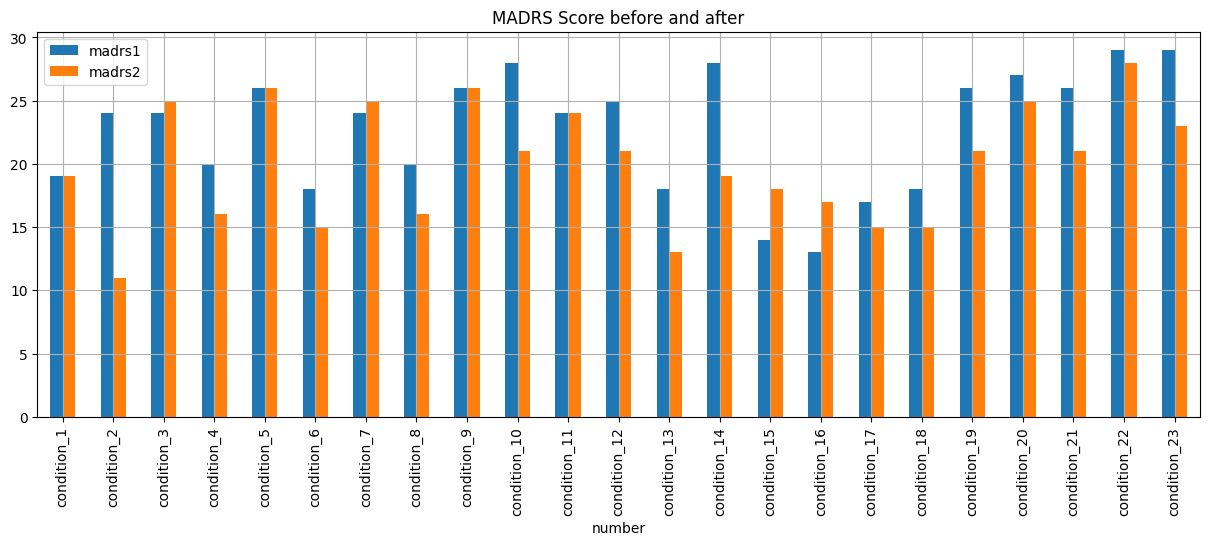

In [ ]:
# Plotting the data with MADRS scores before and after data
plt.rcParams['figure.figsize'] = (15,5)
scores_condition.plot(x='number', y=['madrs1','madrs2'], kind='bar')
plt.title('MADRS Score before and after')
plt.grid()
plt.show()

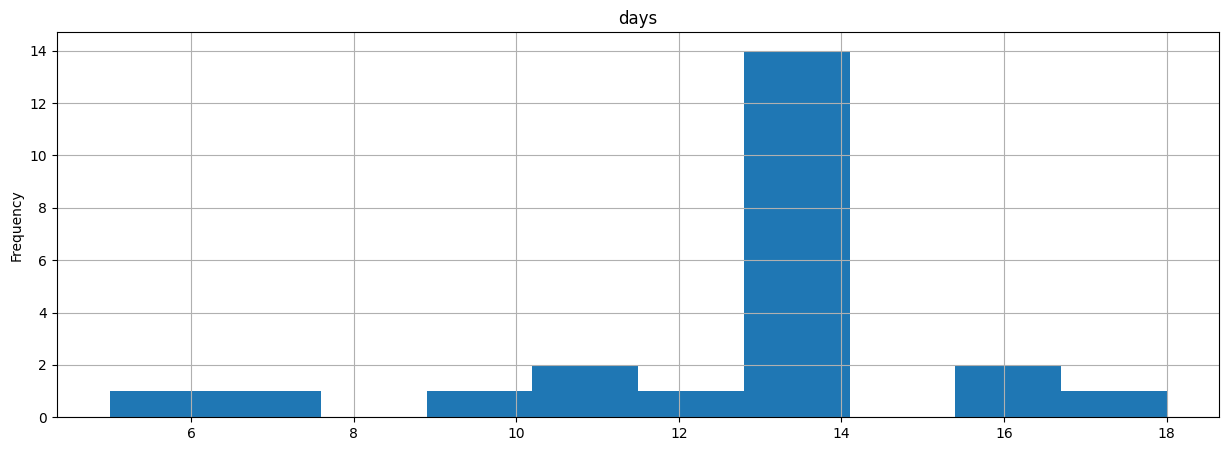

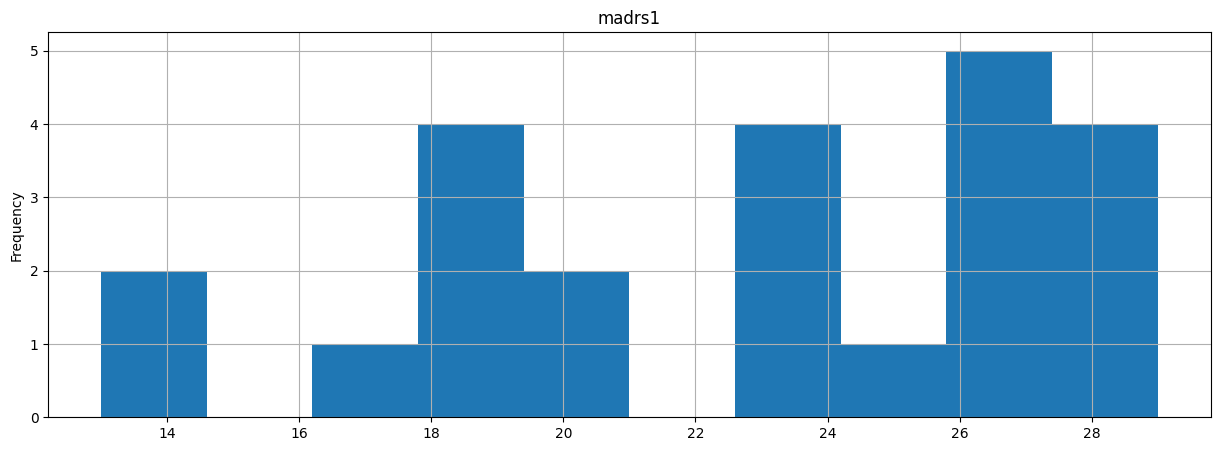

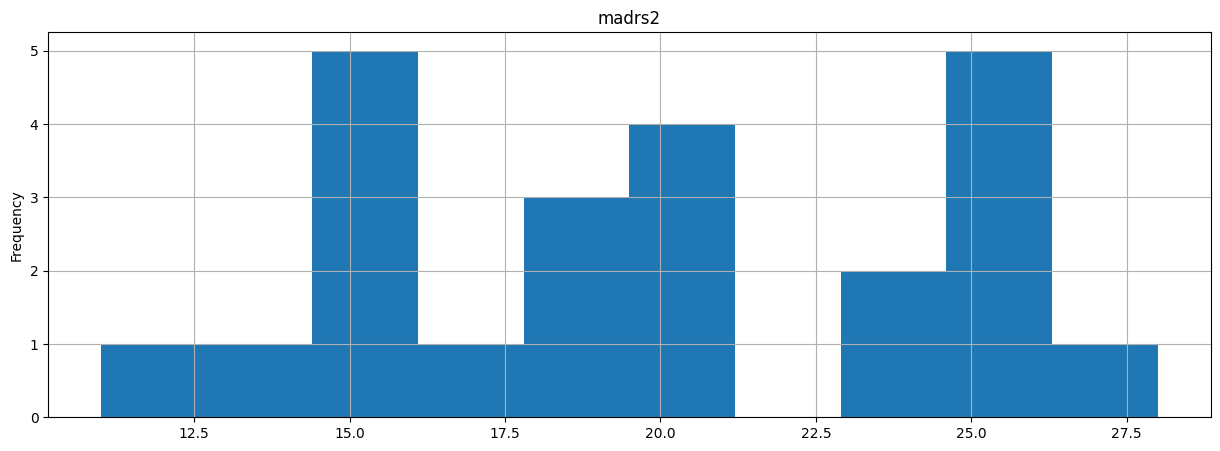

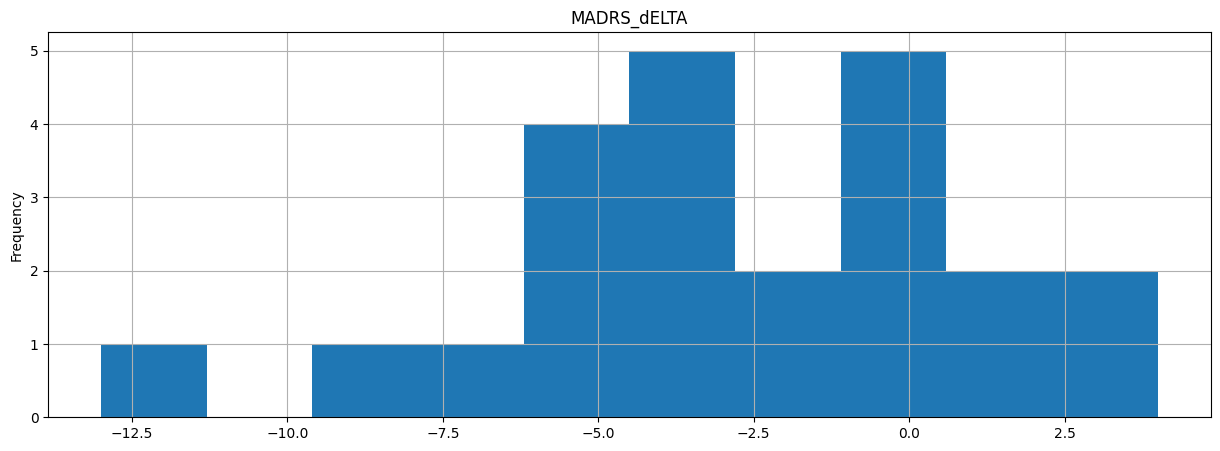

In [ ]:
# Plotting the data as bargraphs
for f in features_num:
    scores_condition[f].plot(kind='hist')
    plt.title(f)
    plt.grid()
    plt.show()

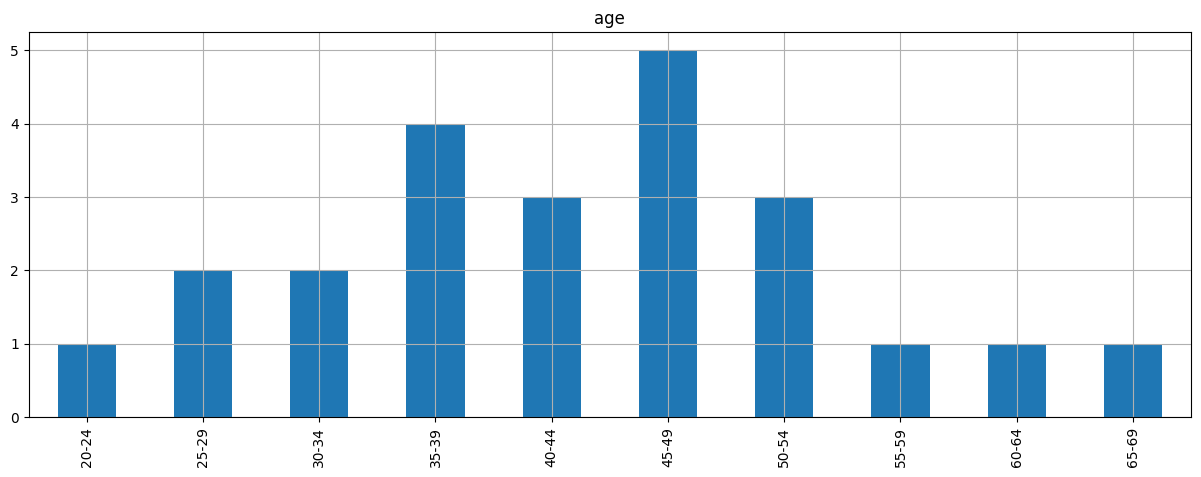

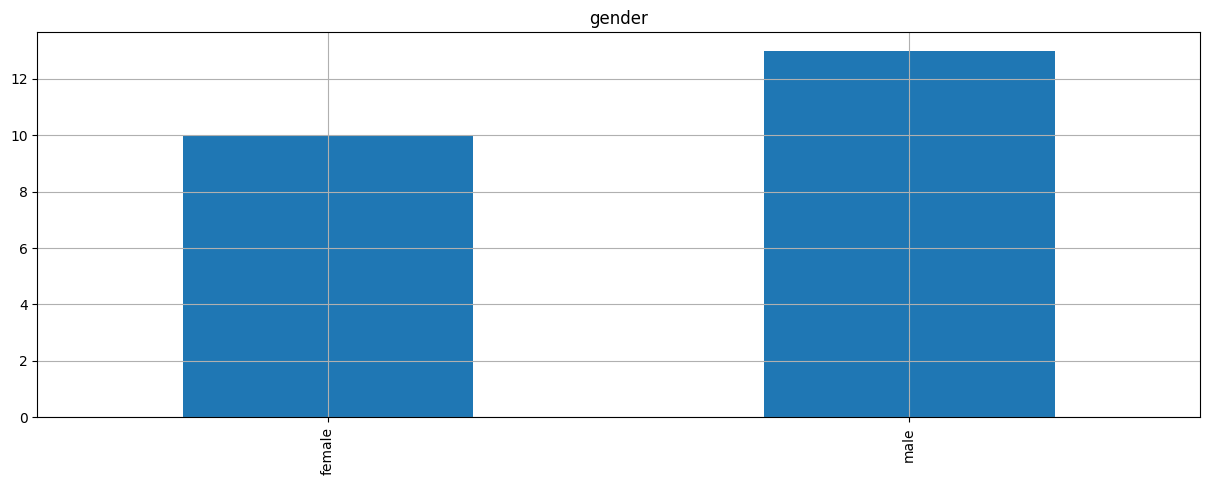

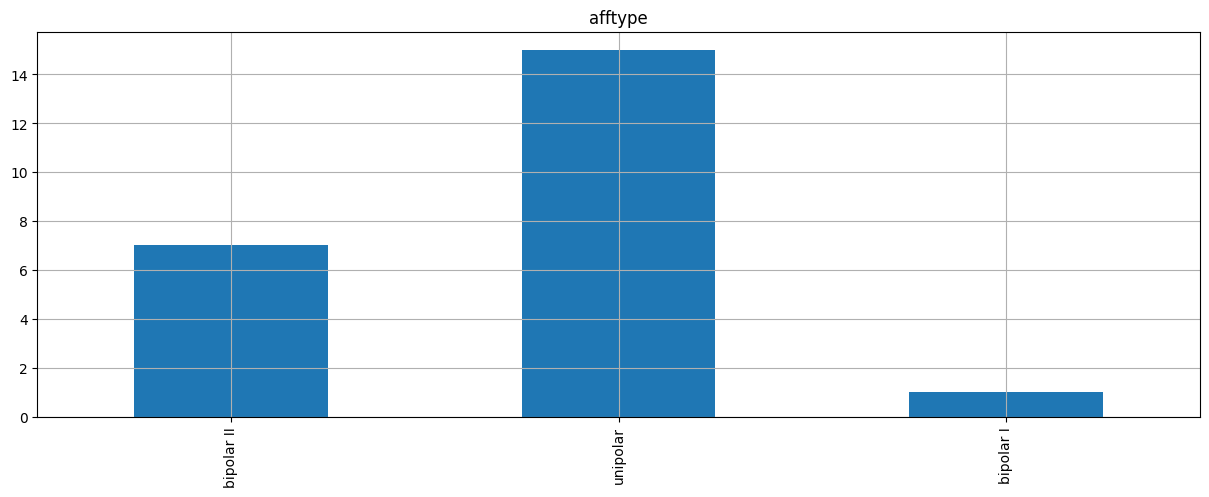

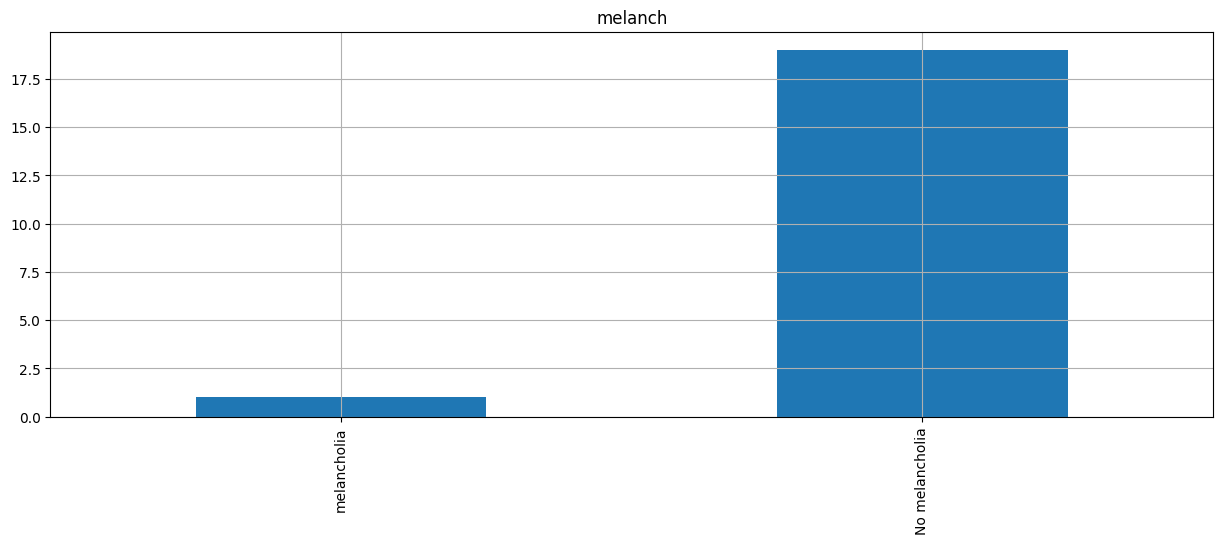

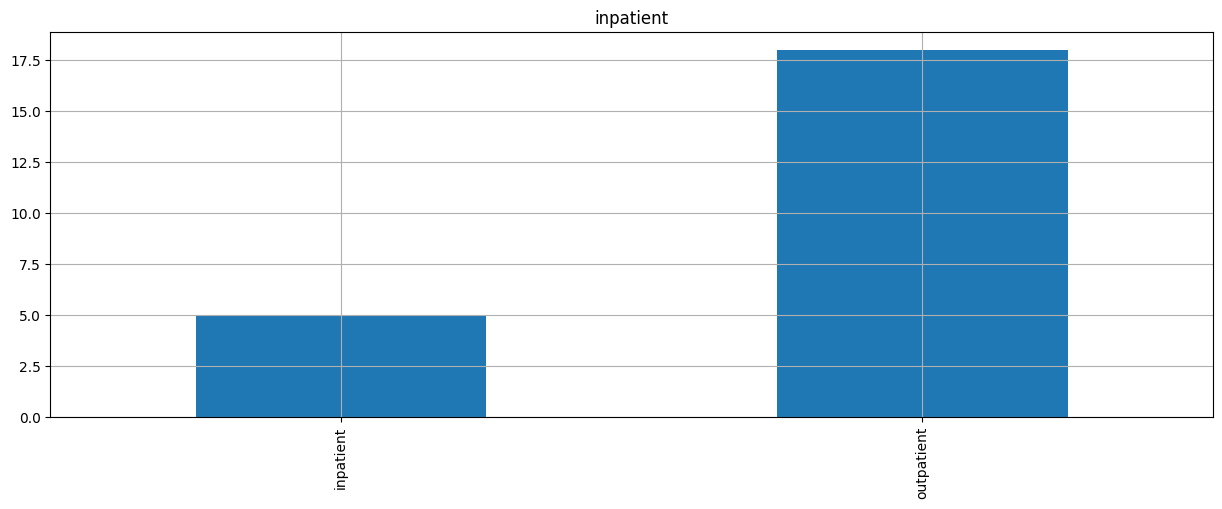

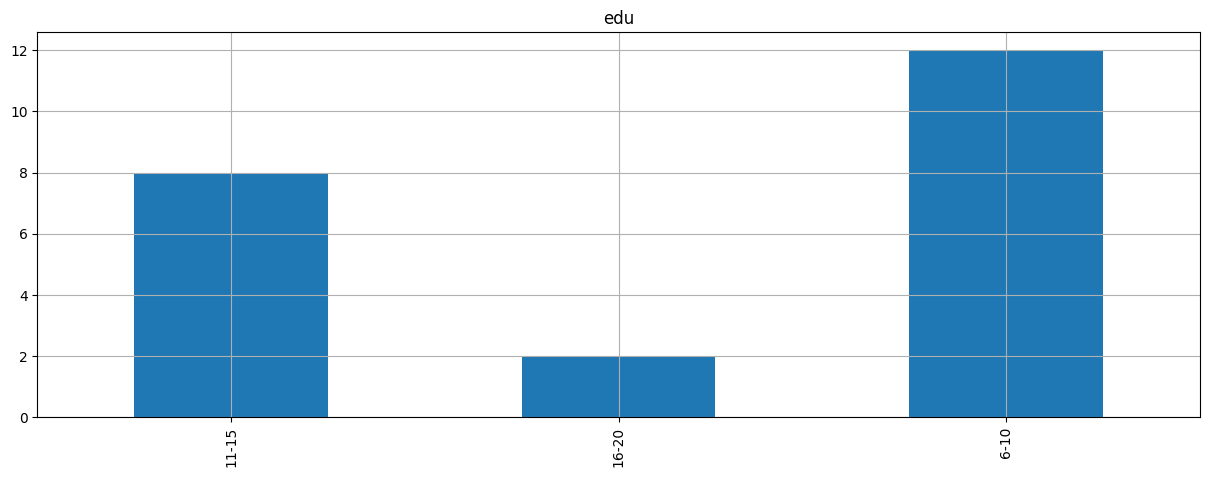

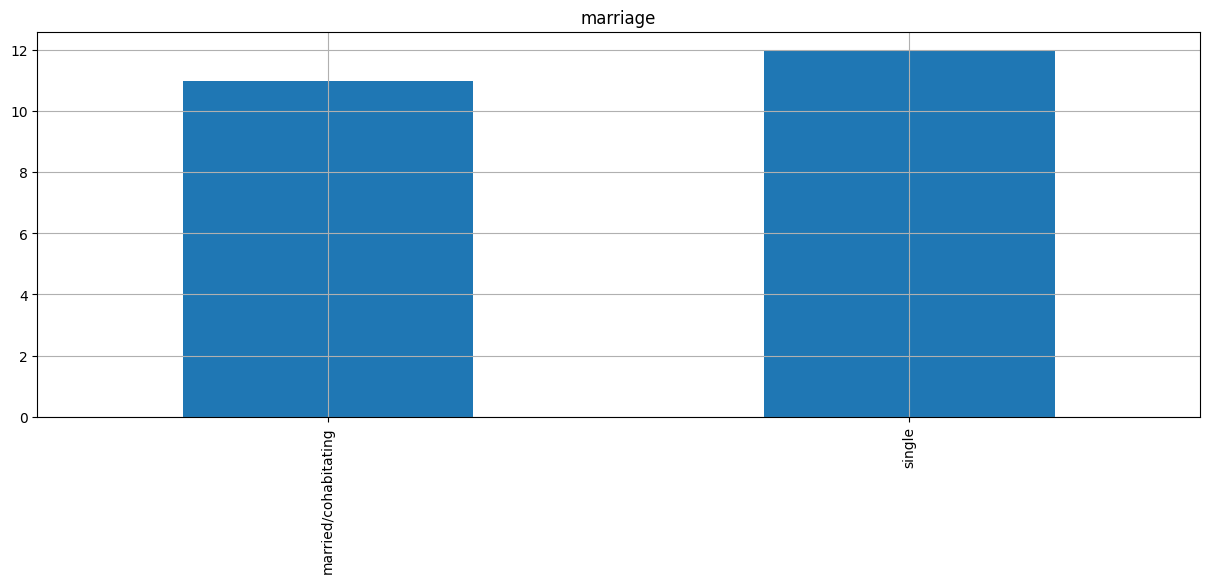

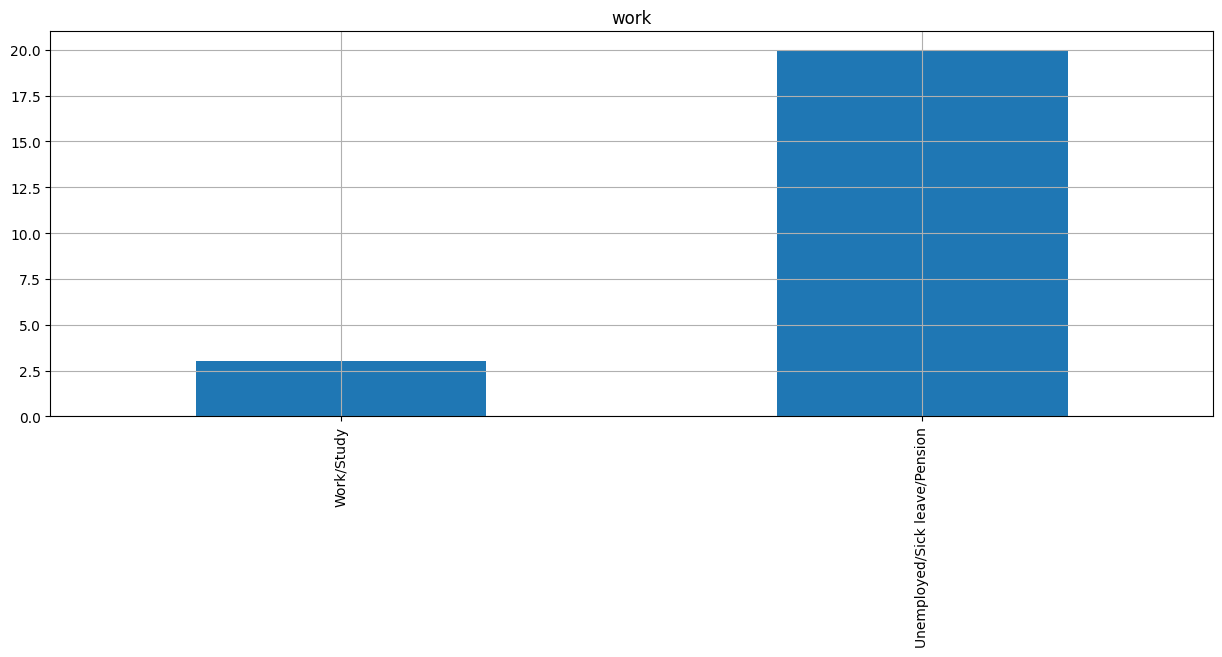

In [ ]:
# Plotting the data as bargraphs with multiple columns
for f in features_cat:
    scores_condition[f].value_counts().sort_index().plot(kind='bar')
    plt.title(f)
    plt.grid()
    plt.show()

In [ ]:
# Importing the pairplot
sns.pairplot

<function seaborn.axisgrid.pairplot(data, *, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)>

### FOR CONDITION AND CONTROL SUBJECTS

In [ ]:
# Importing the data for control 1 and condition 1
control_1 = pd.read_csv('/content/control_1.csv')
condition_1 = pd.read_csv('/content/condition_1.csv')

In [ ]:
# Gathering the shape of the control_1 dataframe
control_1.shape

(51611, 3)

In [ ]:
# Control_1 dataframe and their datatypes
control_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51611 entries, 0 to 51610
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  51611 non-null  object
 1   date       51611 non-null  object
 2   activity   51611 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [ ]:
condition_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23244 entries, 0 to 23243
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  23244 non-null  object
 1   date       23244 non-null  object
 2   activity   23244 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 544.9+ KB


In [ ]:
# Control_1 dataframe and their descriptions
control_1.describe()

,activity
count,51611.000000
mean,98.545078
std,289.655317
min,0.000000
25%,0.000000
50%,0.000000
75%,3.000000
max,6117.000000


In [ ]:
# Gathering the shape of the condition_1 dataframe
condition_1.shape

(23244, 3)

In [ ]:
# Gathering the condition_1 first 5 records
condition_1.head()

,timestamp,date,activity
0,2003-05-07 12:00:00,2003-05-07,0
1,2003-05-07 12:01:00,2003-05-07,143
2,2003-05-07 12:02:00,2003-05-07,0
3,2003-05-07 12:03:00,2003-05-07,20
4,2003-05-07 12:04:00,2003-05-07,166


In [ ]:
# Condition_1 dataframe and their description
condition_1.describe()

,activity
count,23244.000000
mean,146.948030
std,294.592424
min,0.000000
25%,0.000000
50%,9.000000
75%,172.000000
max,3526.000000


<Axes: xlabel='activity', ylabel='Count'>

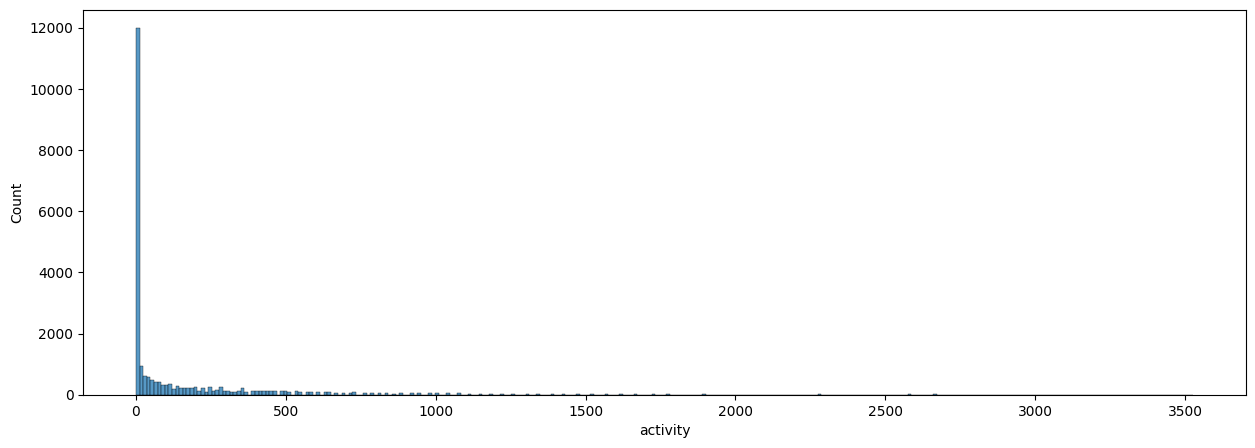

In [ ]:
# Plotting the Activity data in a histograph
sns.histplot(x='activity', data=condition_1)

In [ ]:
# Finding the skew of condition_1
condition_1['activity'].skew()

3.8823677090908344

In [ ]:
# Finding the activity
condition_1['log_activity'] = np.log(condition_1['activity'] + 1)
condition_1['log_activity'].skew()

0.2771381485812395

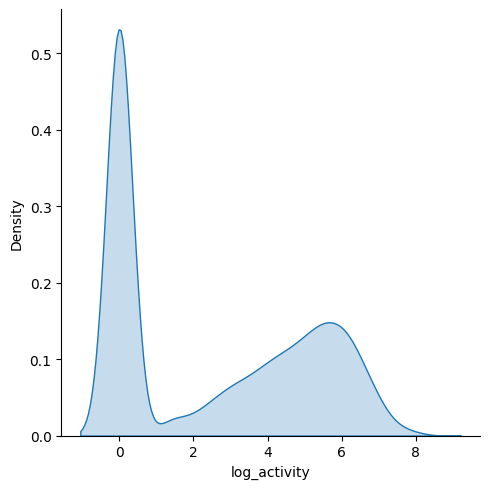

In [ ]:
# Plotting the data for log activity for condition_1
sns.displot(x='log_activity', data=condition_1, kind='kde', fill=True)

In [ ]:
# Finding the skew of control_1
control_1['log_activity'] = np.log(control_1['activity'] + 1)
control_1['log_activity'].skew()

1.2517081703386566

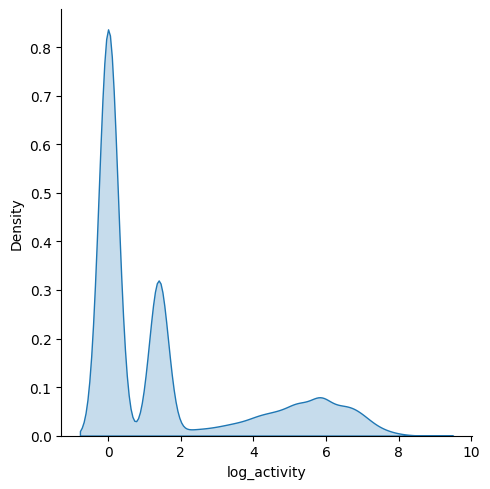

In [ ]:
# Plotting the data for log activity for control_1
sns.displot(x='log_activity', data=control_1, kind='kde', fill=True)

In [ ]:
# Gathering data for timestamp dataset
condition_1.timestamp = condition_1.timestamp.str.split(' ', expand=True)[[1]]
condition_1

,timestamp,date,activity,log_activity
0,12:00:00,2003-05-07,0,0.000000
1,12:01:00,2003-05-07,143,4.969813
2,12:02:00,2003-05-07,0,0.000000
3,12:03:00,2003-05-07,20,3.044522
4,12:04:00,2003-05-07,166,5.117994
...,...,...,...,...
23239,15:19:00,2003-05-23,0,0.000000
23240,15:20:00,2003-05-23,0,0.000000
23241,15:21:00,2003-05-23,0,0.000000
23242,15:22:00,2003-05-23,0,0.000000


In [ ]:
#hourly:
condition_1['hour'] = condition_1.timestamp.str.split(':', expand=True)[[0]]


In [ ]:
# Writing a function to groupby data to a certain variable
ab = condition_1.groupby(['date', 'hour'])['activity'].sum()
condition_1_aggr = pd.DataFrame(columns=('date','hour','activity'))
for i in range(0,len(ab)):
    condition_1_aggr=condition_1_aggr.append({'date':ab.index[i][0],'hour': ab.index[i][1],'activity': ab[i]},ignore_index=True)
condition_1_aggr

<ipython-input-35-ed84024ee33f>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  condition_1_aggr=condition_1_aggr.append({'date':ab.index[i][0],'hour': ab.index[i][1],'activity': ab[i]},ignore_index=True)
<ipython-input-35-ed84024ee33f>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  condition_1_aggr=condition_1_aggr.append({'date':ab.index[i][0],'hour': ab.index[i][1],'activity': ab[i]},ignore_index=True)
<ipython-input-35-ed84024ee33f>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  condition_1_aggr=condition_1_aggr.append({'date':ab.index[i][0],'hour': ab.index[i][1],'activity': ab[i]},ignore_index=True)
<ipython-input-35-ed84024ee33f>:5: FutureWarning: The frame.append method is deprecated and will be removed from pa

,date,hour,activity
0,2003-05-07,12,20793
1,2003-05-07,13,17074
2,2003-05-07,14,16751
3,2003-05-07,15,13127
4,2003-05-07,16,14313
...,...,...,...
383,2003-05-23,11,0
384,2003-05-23,12,0
385,2003-05-23,13,0
386,2003-05-23,14,684


<Figure size 1600x800 with 0 Axes>

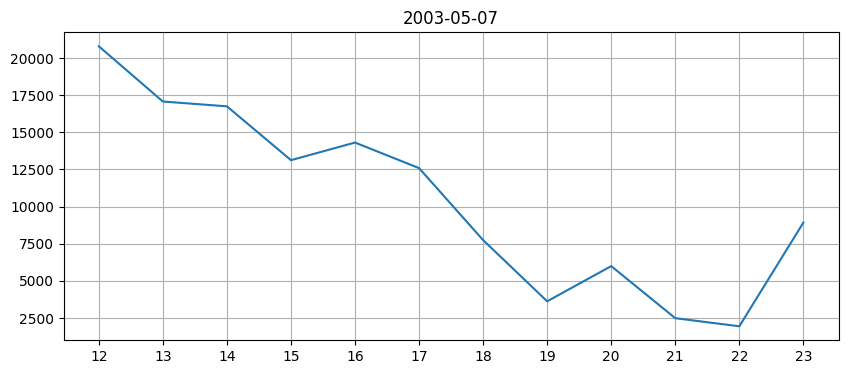

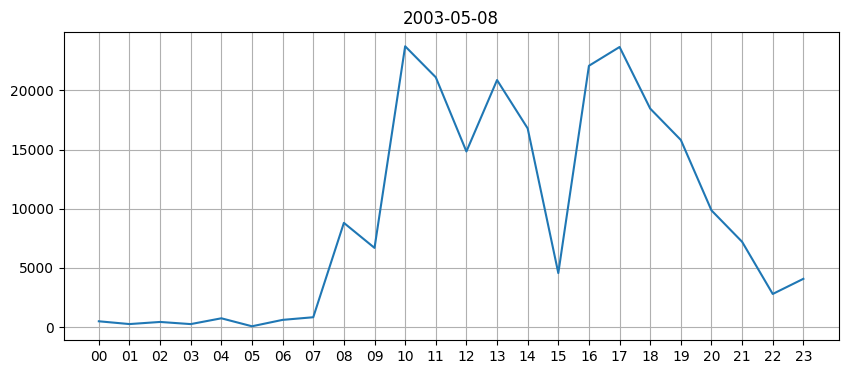

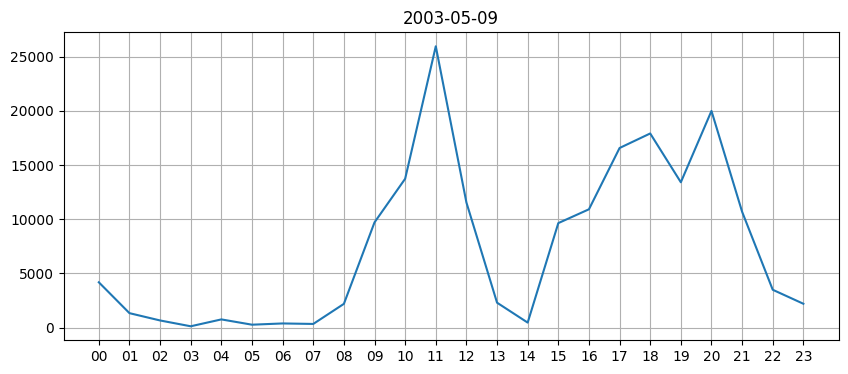

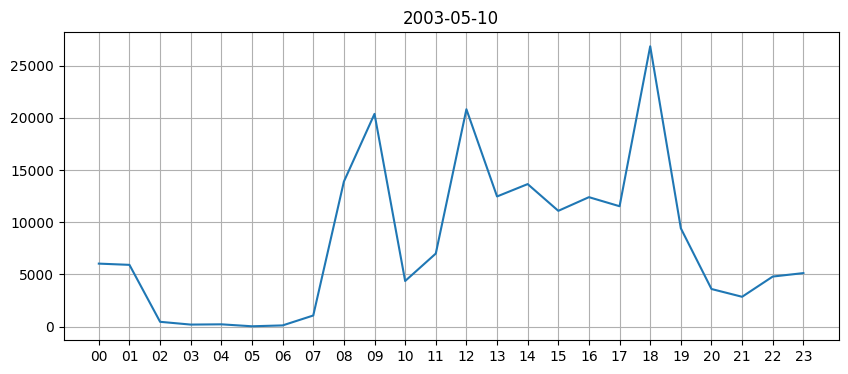

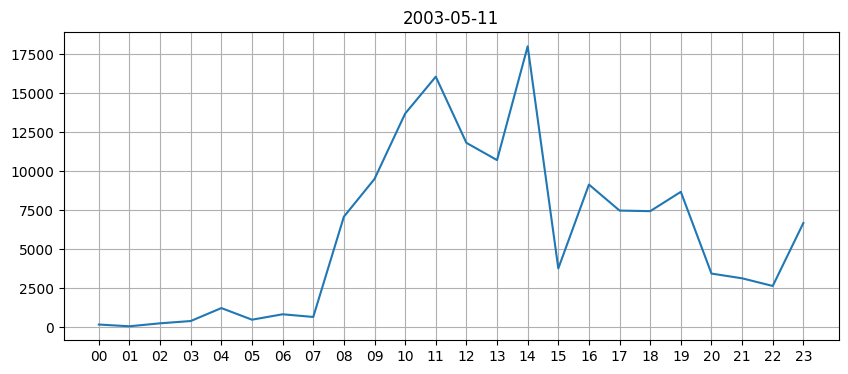

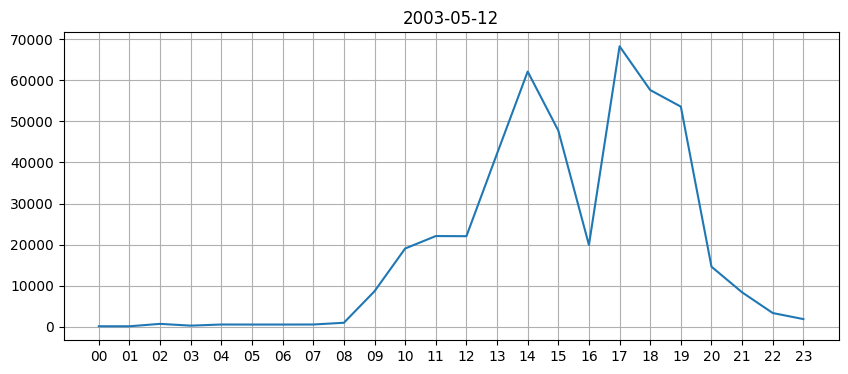

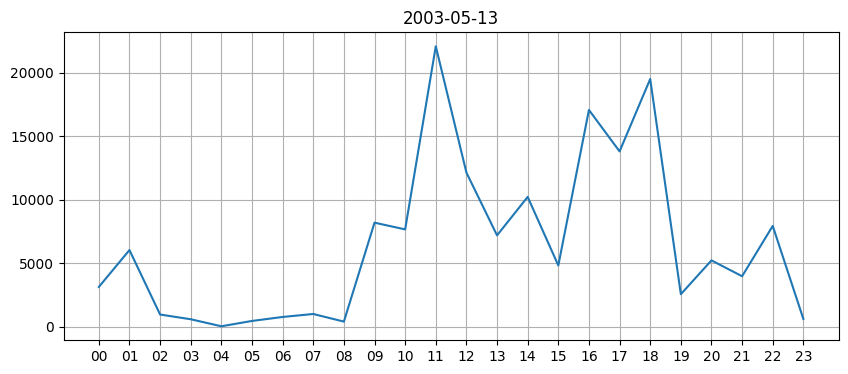

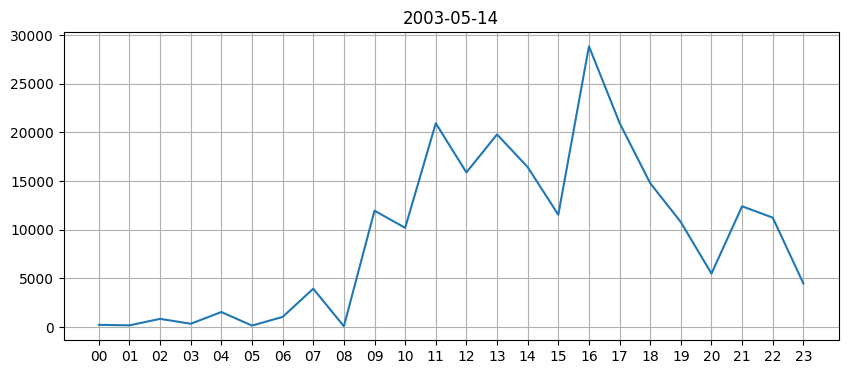

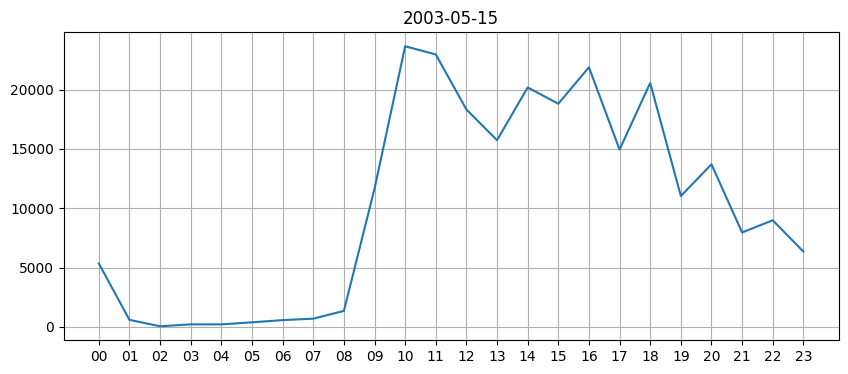

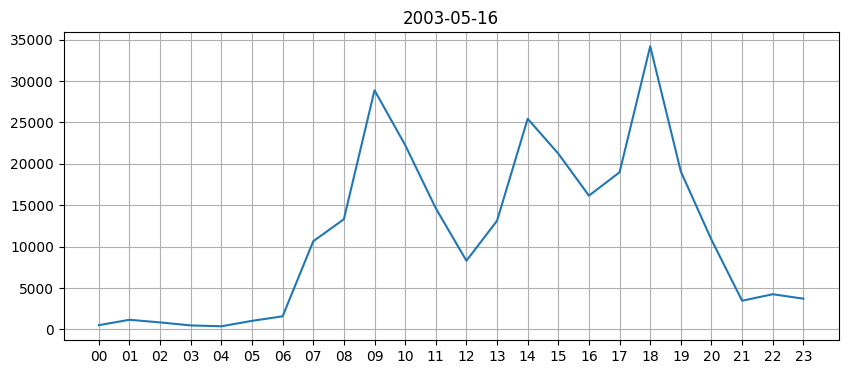

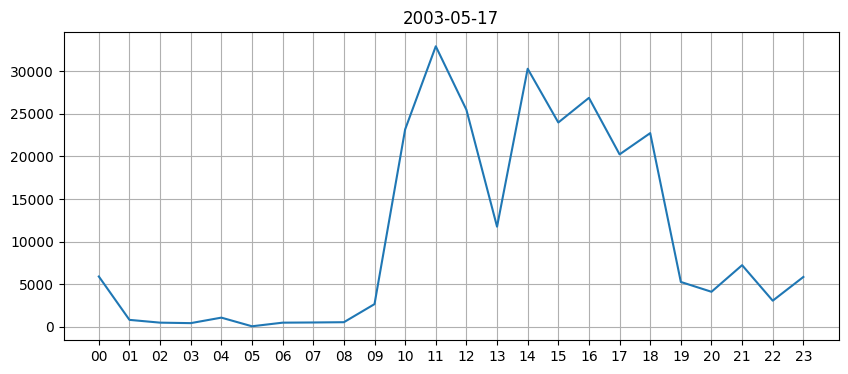

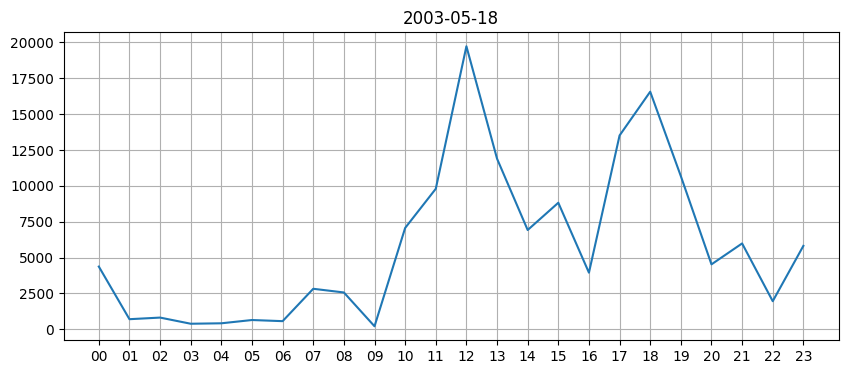

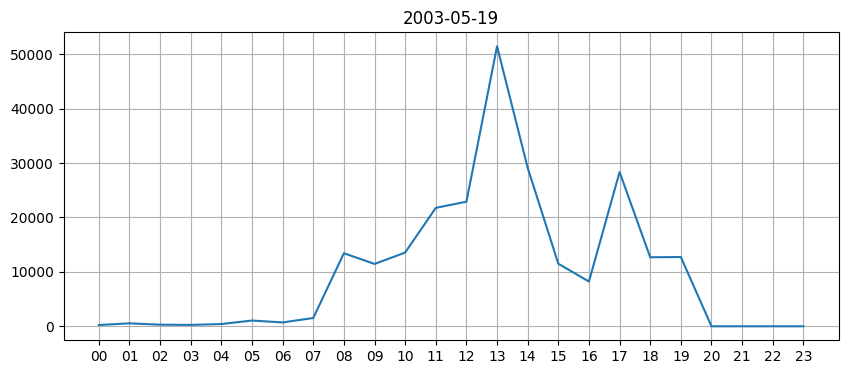

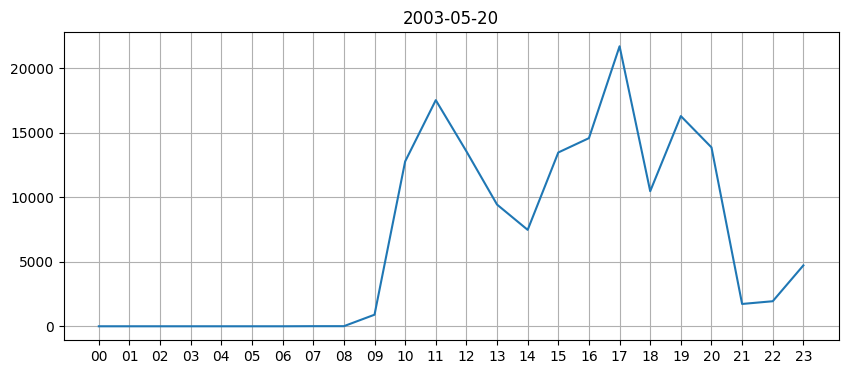

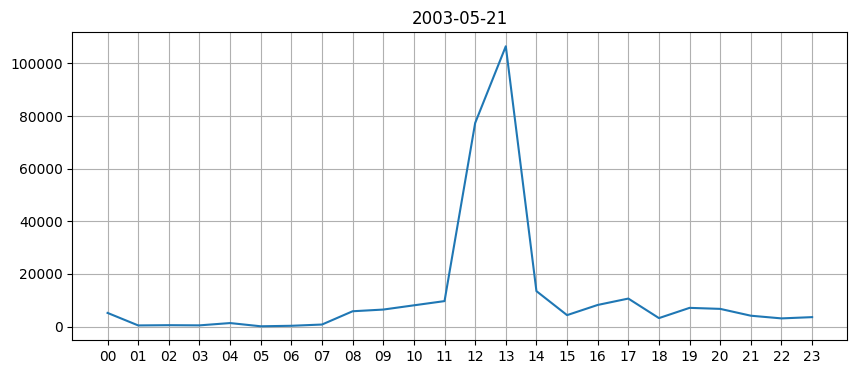

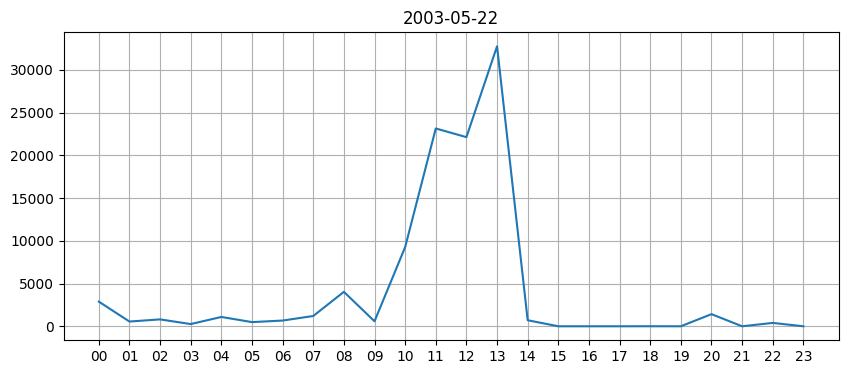

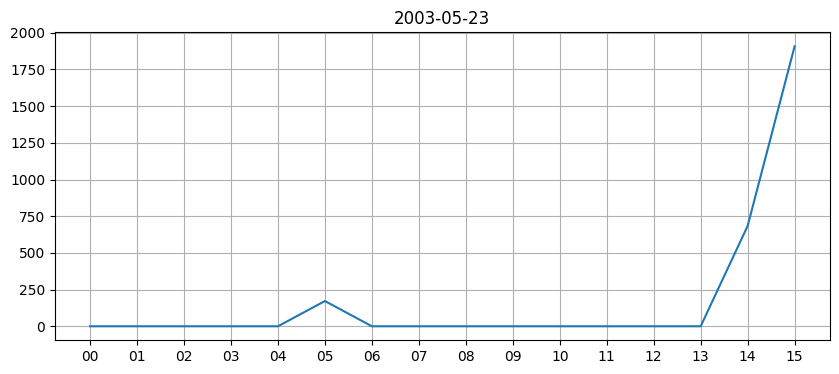

In [ ]:
# Plotting a line graph for data
plt.figure(figsize=(16,8))
for i in condition_1_aggr.date.unique():
    plt.figure(figsize=(10,4))
    selected_data = condition_1_aggr.loc[condition_1_aggr['date'] == i]
    plt.plot(selected_data['hour'], selected_data['activity'])
    plt.title(i)
    plt.grid()
    plt.show()

### Data Correlation

In [ ]:
# Gathering a correlations of the dataframe
df.corr()

<ipython-input-39-1dcdca1419e6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,days,gender,afftype,melanch,inpatient,marriage,work,madrs1,madrs2
days,1.000000,-0.073955,-0.184464,0.010070,-0.223032,0.390647,0.045526,0.122678,0.027726
gender,-0.073955,1.000000,0.064884,0.253629,0.175655,0.038169,-0.079259,-0.104832,-0.303410
afftype,-0.184464,0.064884,1.000000,-0.089984,-0.259938,-0.143091,0.053060,-0.132523,0.088863
melanch,0.010070,0.253629,-0.089984,1.000000,0.397360,0.253629,-0.076472,-0.202332,-0.270243
inpatient,-0.223032,0.175655,-0.259938,0.397360,1.000000,-0.293590,-0.204124,-0.523501,-0.410235
marriage,0.390647,0.038169,-0.143091,0.253629,-0.293590,1.000000,0.146077,0.447590,0.150551
work,0.045526,-0.079259,0.053060,-0.076472,-0.204124,0.146077,1.000000,0.281104,0.027913
madrs1,0.122678,-0.104832,-0.132523,-0.202332,-0.523501,0.447590,0.281104,1.000000,0.653090
madrs2,0.027726,-0.303410,0.088863,-0.270243,-0.410235,0.150551,0.027913,0.653090,1.000000


<ipython-input-40-ee84a3627e83>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='YlOrRd')


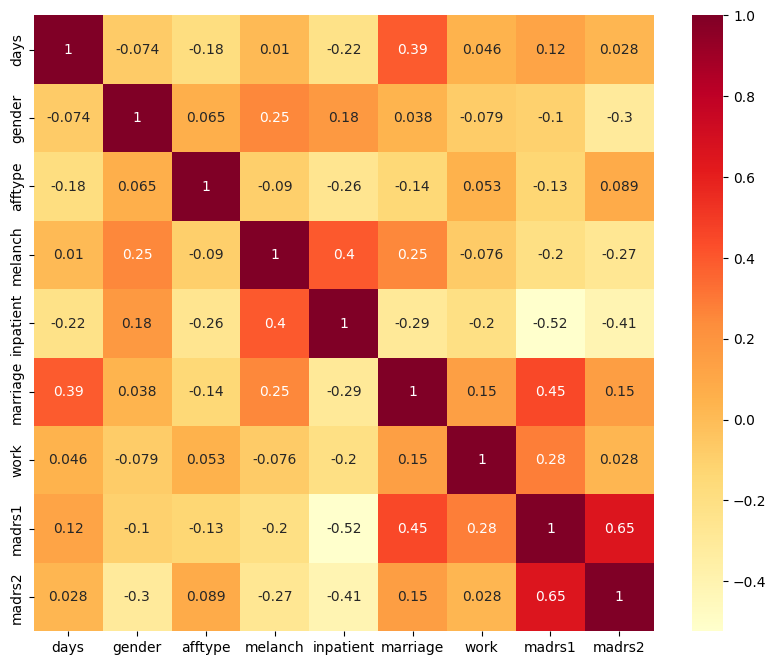

In [ ]:
# Plotting a Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='YlOrRd')
plt.show()

<Axes: xlabel='work', ylabel='madrs1'>

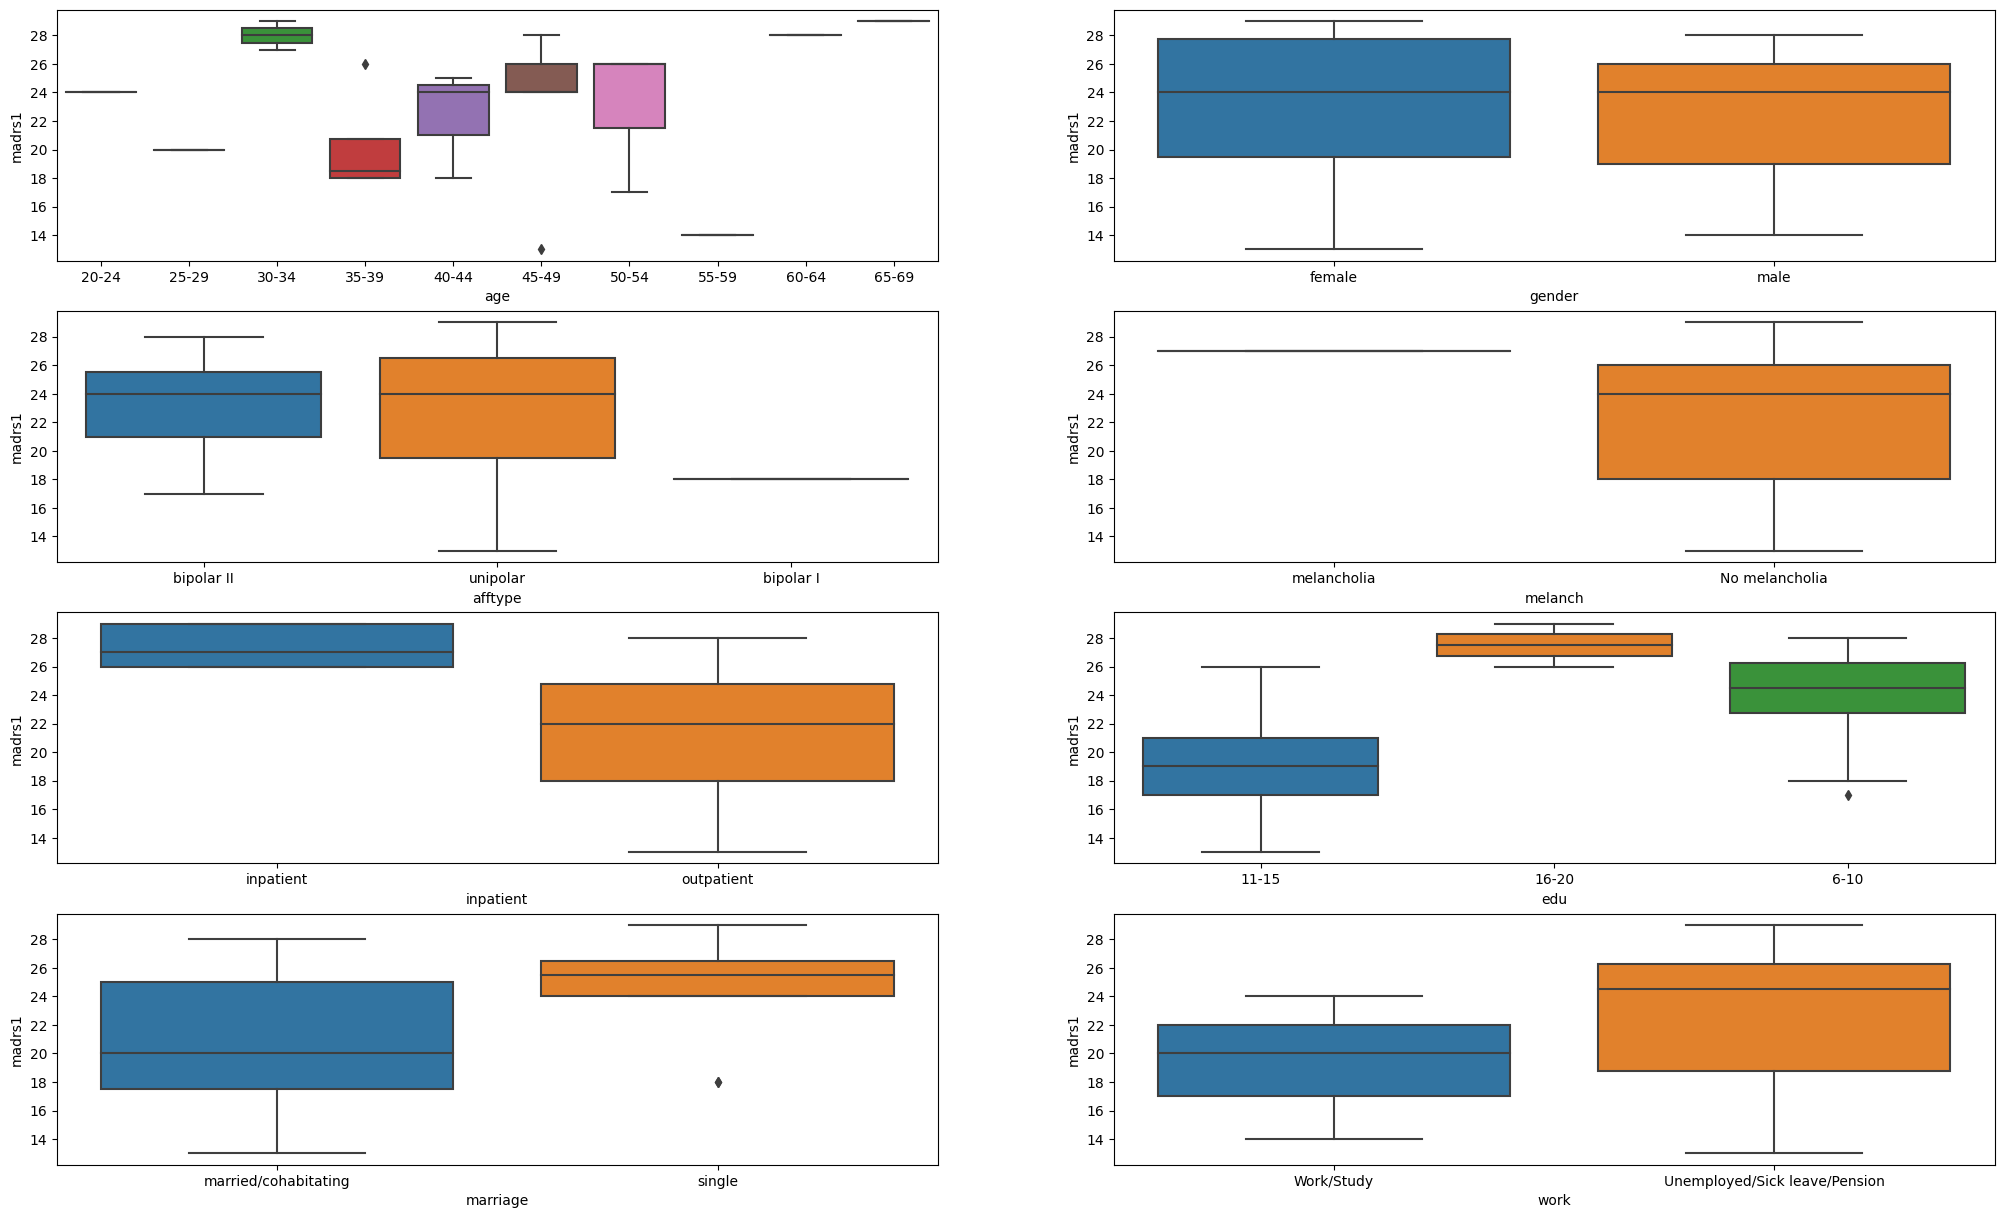

In [ ]:
# Plotting various data into various data plots for madrs 1
plt.figure(figsize=(25,15))

plt.subplot(4,2,1)
sns.boxplot(x='age',y='madrs1',data=scores)

plt.subplot(4,2,2)
sns.boxplot(x='gender',y='madrs1',data=scores)

plt.subplot(4,2,3)
sns.boxplot(x='afftype',y='madrs1',data=scores)

plt.subplot(4,2,4)
sns.boxplot(x='melanch',y='madrs1',data=scores)

plt.subplot(4,2,5)
sns.boxplot(x='inpatient',y='madrs1',data=scores)

plt.subplot(4,2,6)
sns.boxplot(x='edu',y='madrs1',data=scores)

plt.subplot(4,2,7)
sns.boxplot(x='marriage',y='madrs1',data=scores)

plt.subplot(4,2,8)
sns.boxplot(x='work',y='madrs1',data=scores)

<Axes: xlabel='work', ylabel='madrs1'>

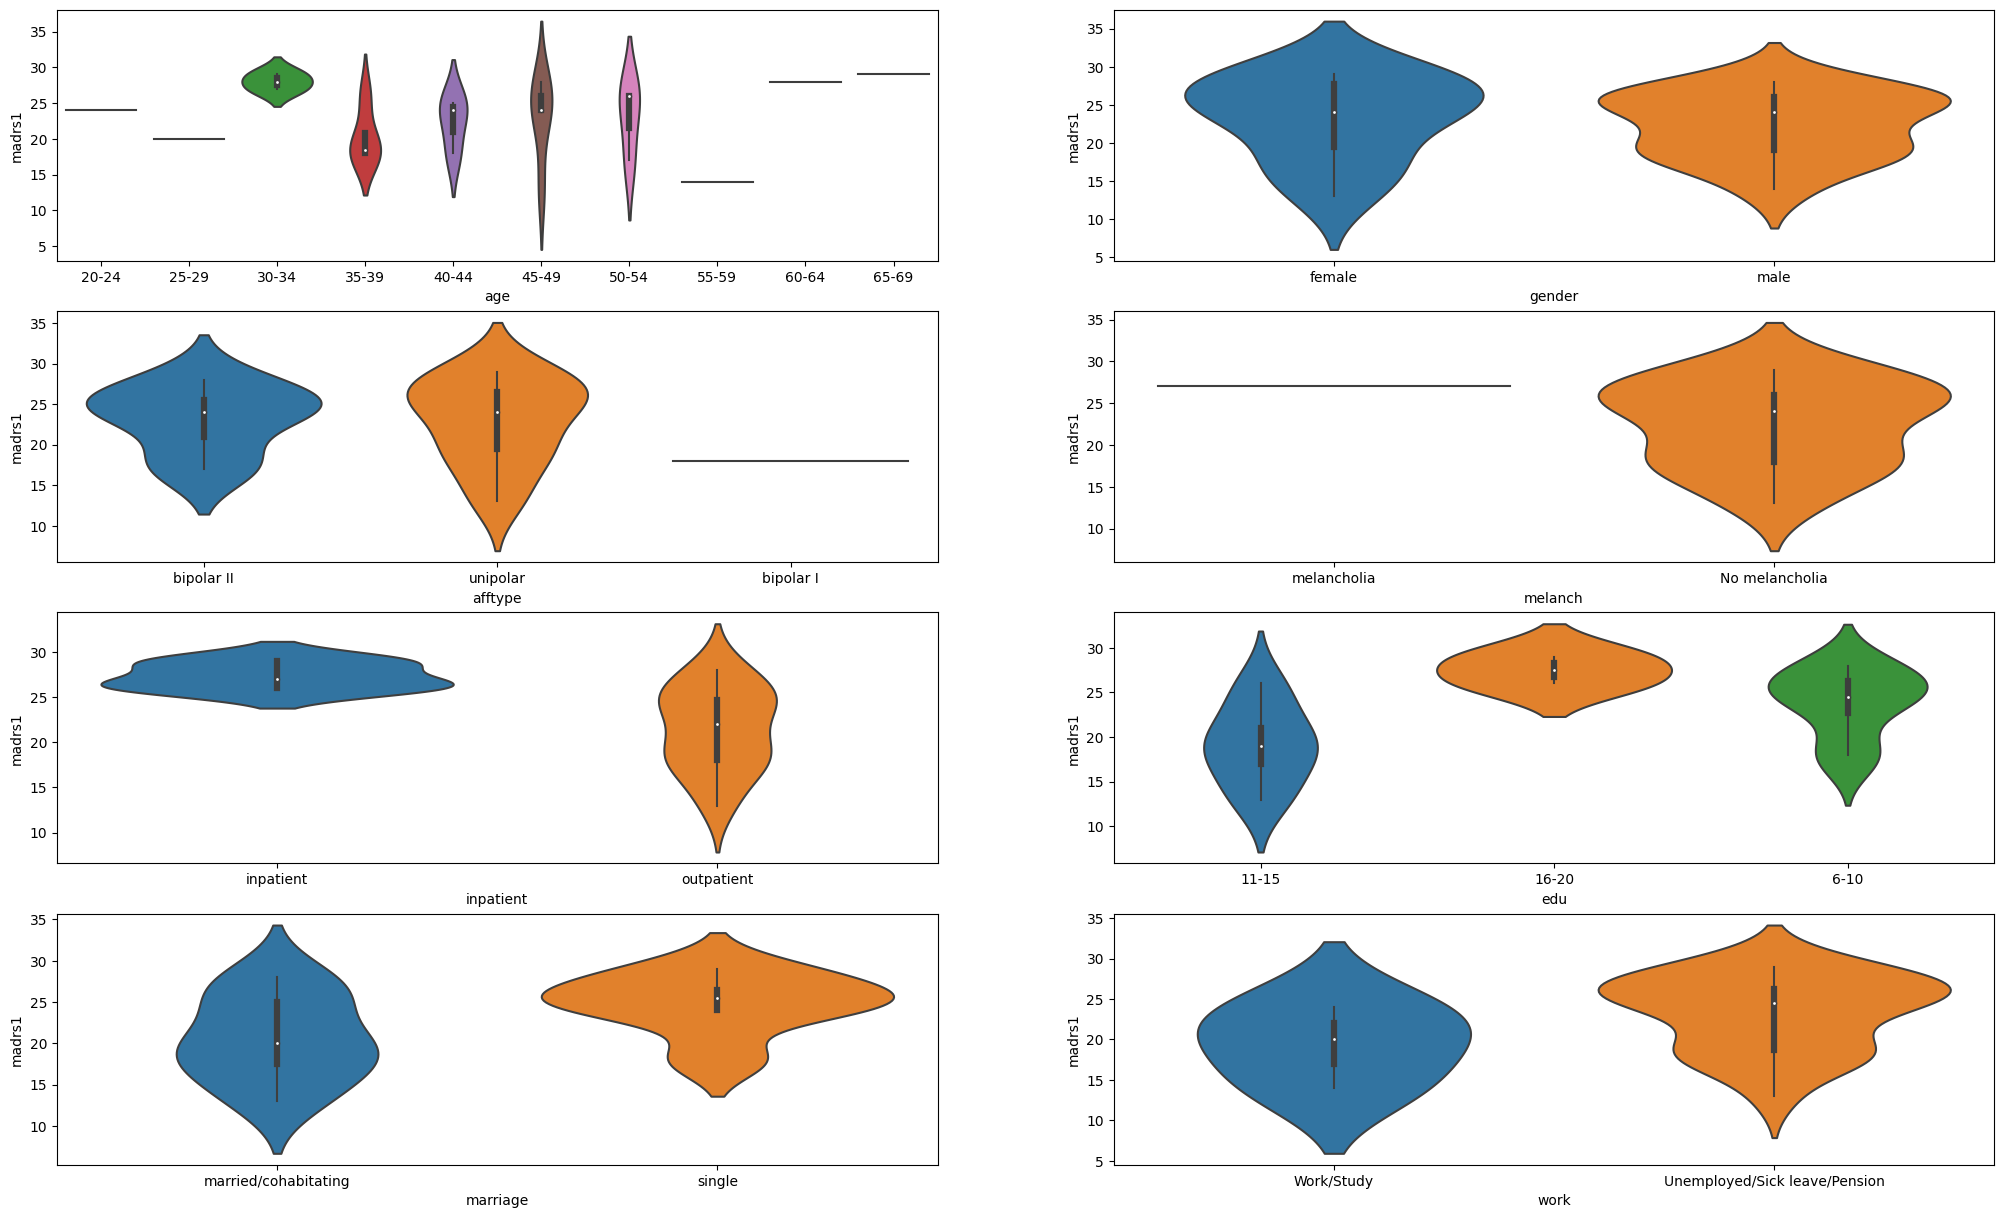

In [ ]:
# Plotting various data into various violinplot for madrs1
plt.figure(figsize=(25,15))

plt.subplot(4,2,1)
sns.violinplot(x='age',y='madrs1',data=scores)

plt.subplot(4,2,2)
sns.violinplot(x='gender',y='madrs1',data=scores)

plt.subplot(4,2,3)
sns.violinplot(x='afftype',y='madrs1',data=scores)

plt.subplot(4,2,4)
sns.violinplot(x='melanch',y='madrs1',data=scores)

plt.subplot(4,2,5)
sns.violinplot(x='inpatient',y='madrs1',data=scores)

plt.subplot(4,2,6)
sns.violinplot(x='edu',y='madrs1',data=scores)

plt.subplot(4,2,7)
sns.violinplot(x='marriage',y='madrs1',data=scores)

plt.subplot(4,2,8)
sns.violinplot(x='work',y='madrs1',data=scores)

<Axes: xlabel='work', ylabel='madrs2'>

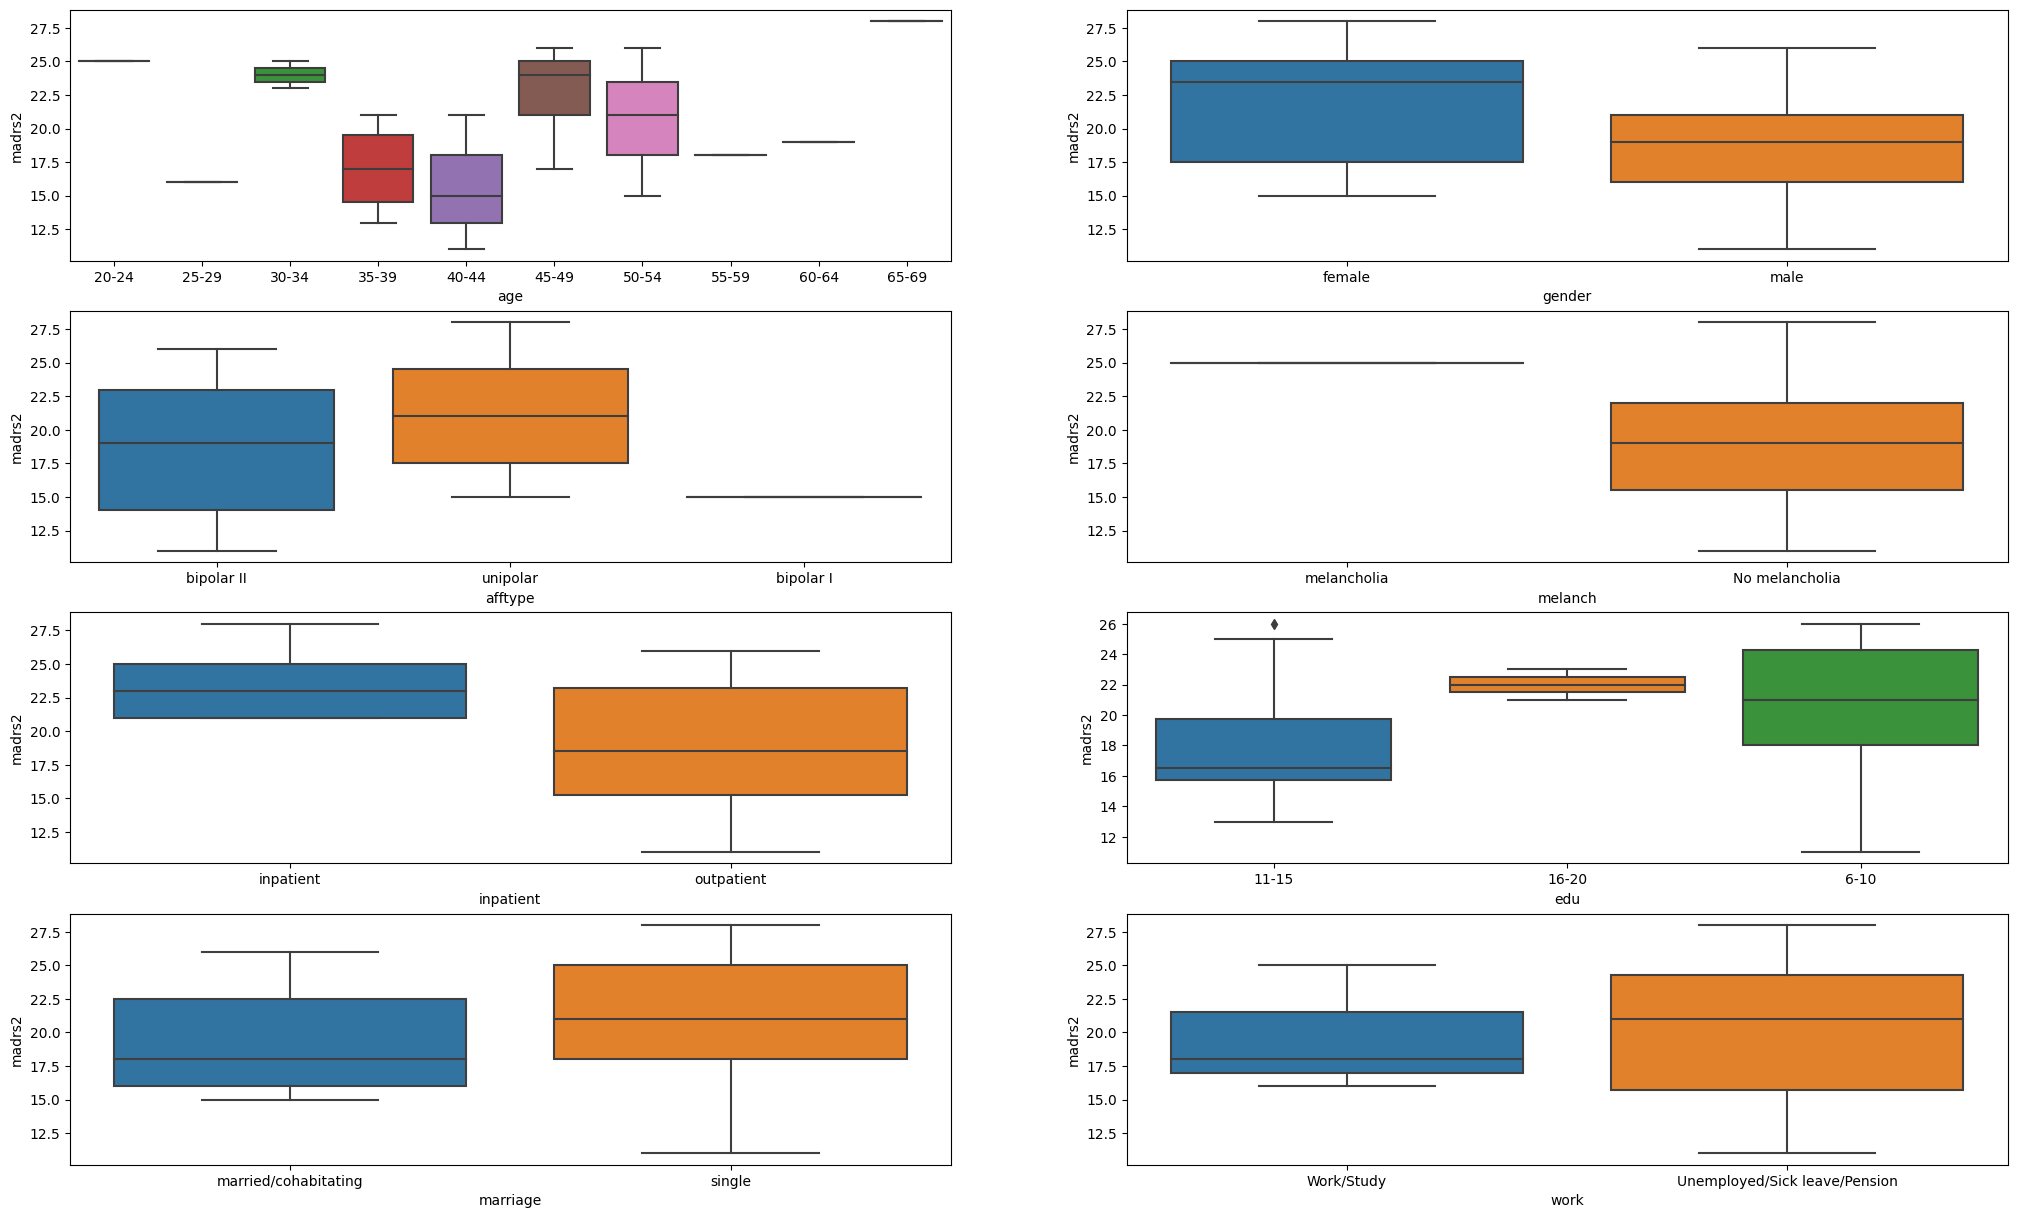

In [ ]:
# Plotting various data into various boxplots for madrs2
plt.figure(figsize=(25,15))

plt.subplot(4,2,1)
sns.boxplot(x='age',y='madrs2',data=scores)

plt.subplot(4,2,2)
sns.boxplot(x='gender',y='madrs2',data=scores)

plt.subplot(4,2,3)
sns.boxplot(x='afftype',y='madrs2',data=scores)

plt.subplot(4,2,4)
sns.boxplot(x='melanch',y='madrs2',data=scores)

plt.subplot(4,2,5)
sns.boxplot(x='inpatient',y='madrs2',data=scores)

plt.subplot(4,2,6)
sns.boxplot(x='edu',y='madrs2',data=scores)

plt.subplot(4,2,7)
sns.boxplot(x='marriage',y='madrs2',data=scores)

plt.subplot(4,2,8)
sns.boxplot(x='work',y='madrs2',data=scores)

<Axes: xlabel='work', ylabel='madrs2'>

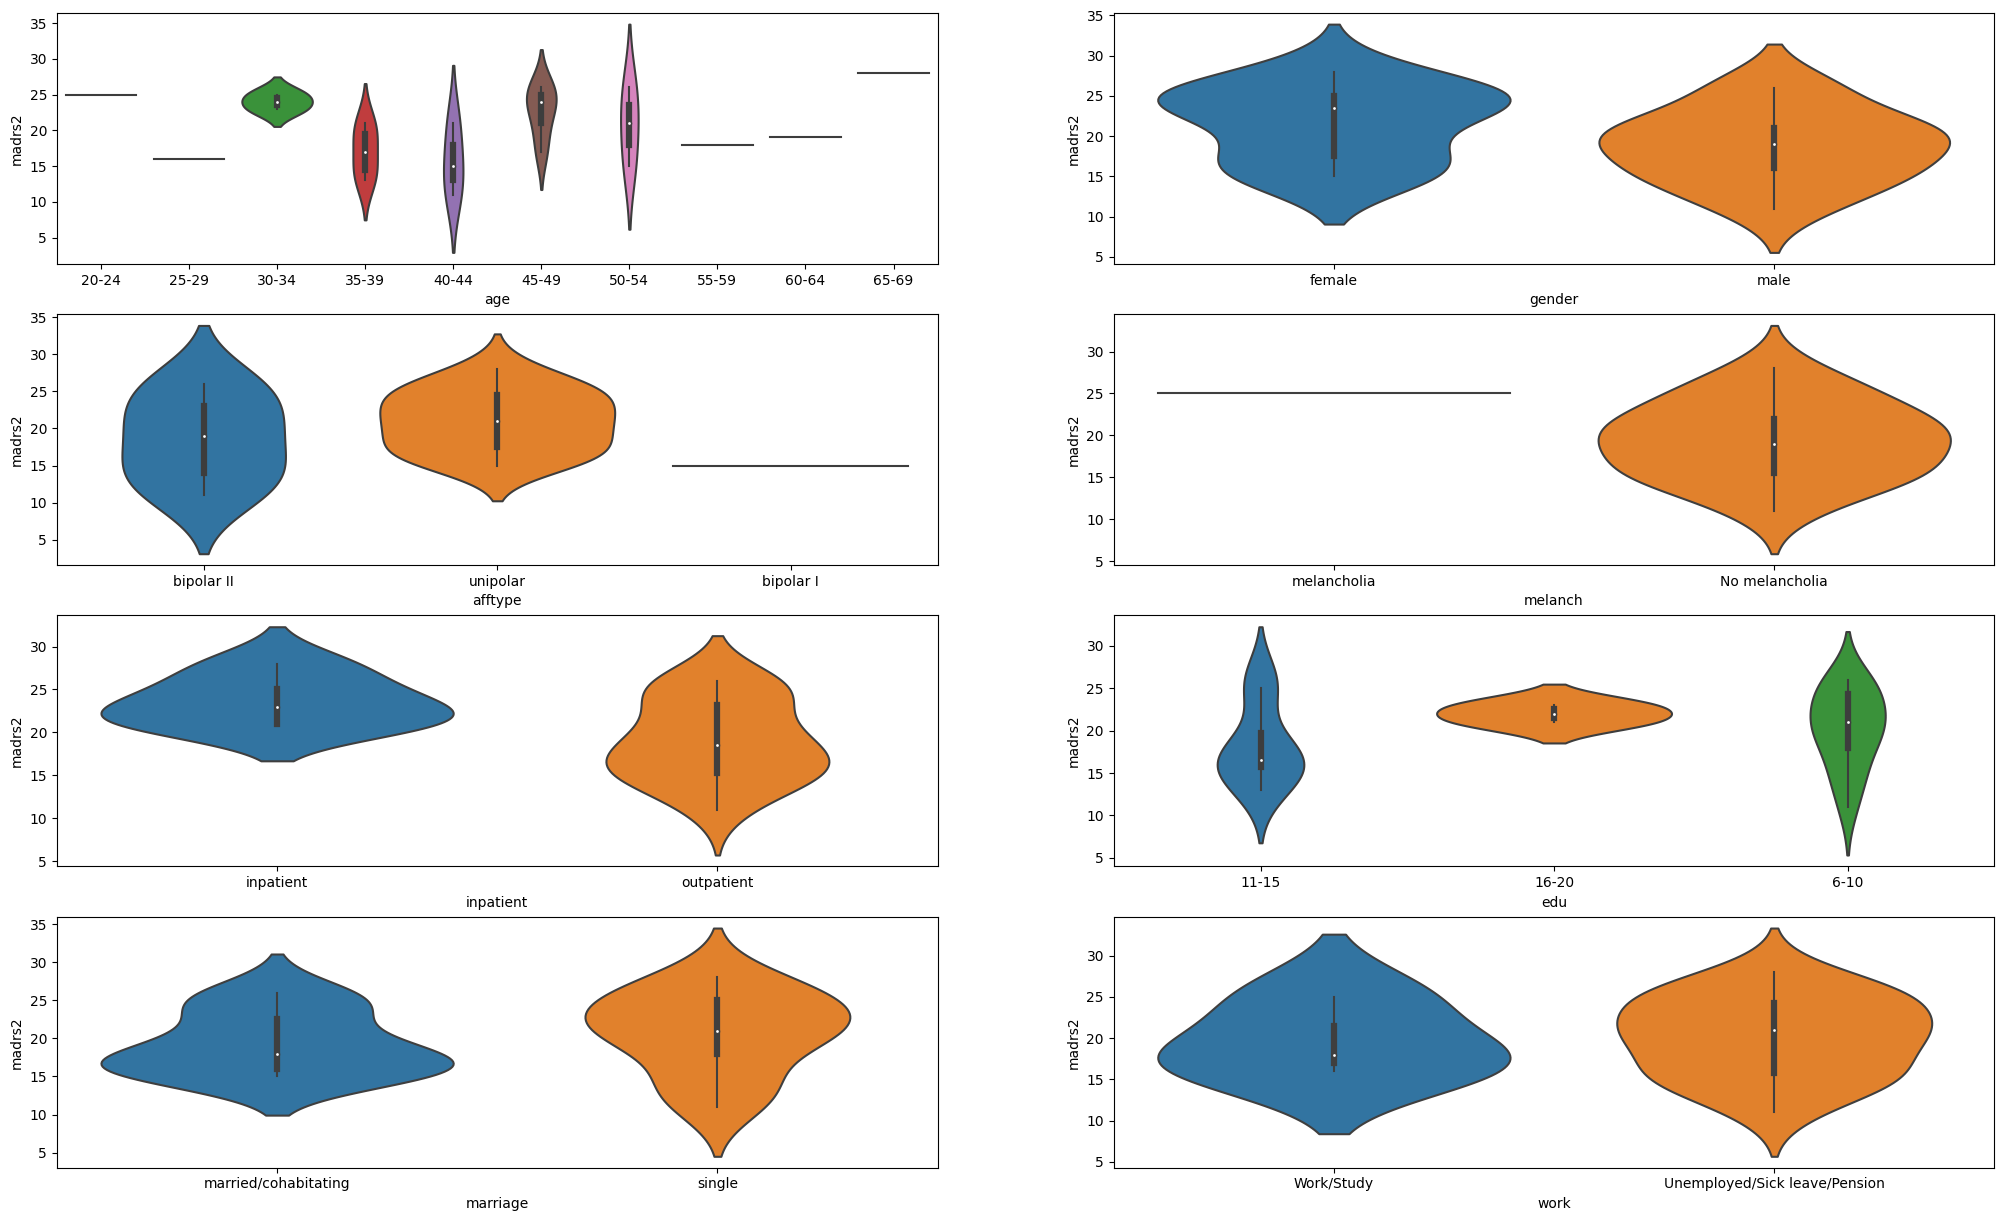

In [ ]:
# Plotting various data into various data plots for madrs2
plt.figure(figsize=(25,15))

plt.subplot(4,2,1)
sns.violinplot(x='age',y='madrs2',data=scores)

plt.subplot(4,2,2)
sns.violinplot(x='gender',y='madrs2',data=scores)

plt.subplot(4,2,3)
sns.violinplot(x='afftype',y='madrs2',data=scores)

plt.subplot(4,2,4)
sns.violinplot(x='melanch',y='madrs2',data=scores)

plt.subplot(4,2,5)
sns.violinplot(x='inpatient',y='madrs2',data=scores)

plt.subplot(4,2,6)
sns.violinplot(x='edu',y='madrs2',data=scores)

plt.subplot(4,2,7)
sns.violinplot(x='marriage',y='madrs2',data=scores)

plt.subplot(4,2,8)
sns.violinplot(x='work',y='madrs2',data=scores)

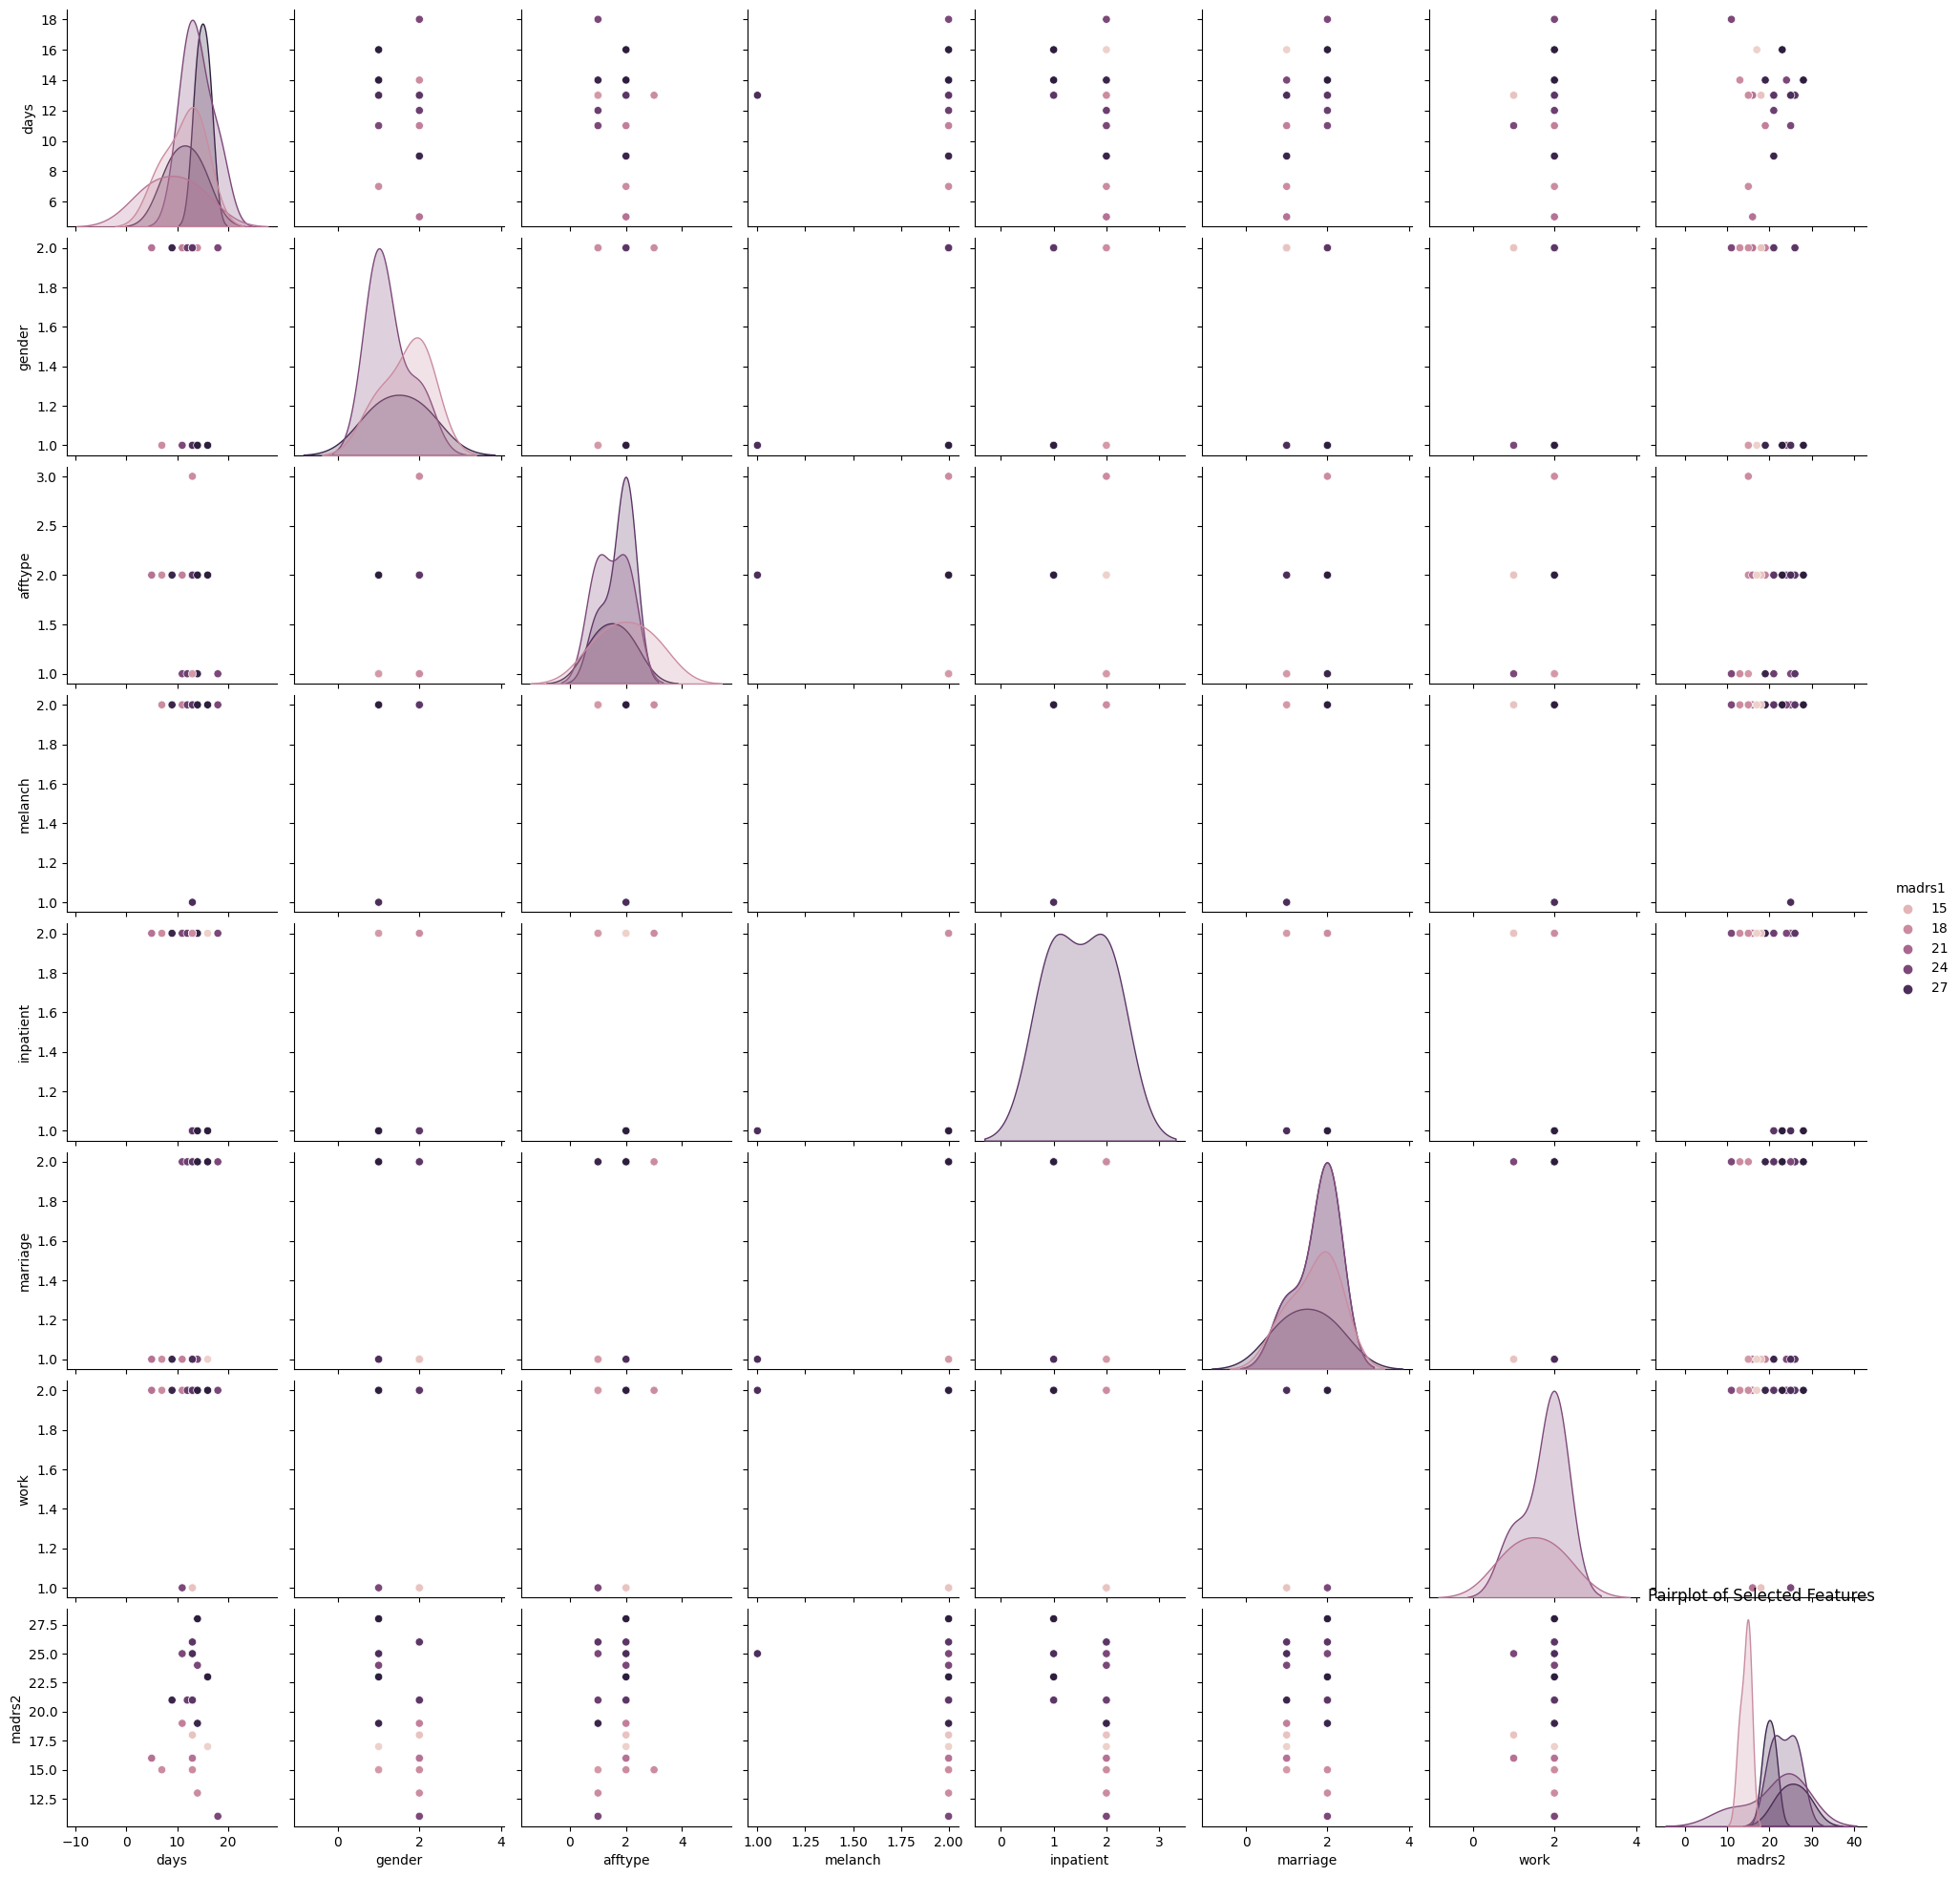

In [ ]:
# Plotting various data into various pairplots
selected_features = ['days', 'gender', 'afftype', 'melanch', 'inpatient','marriage','work','madrs1','madrs2']
sns.pairplot (df[selected_features], hue='madrs1')
plt.title('Pairplot of Selected Features')
plt.show()

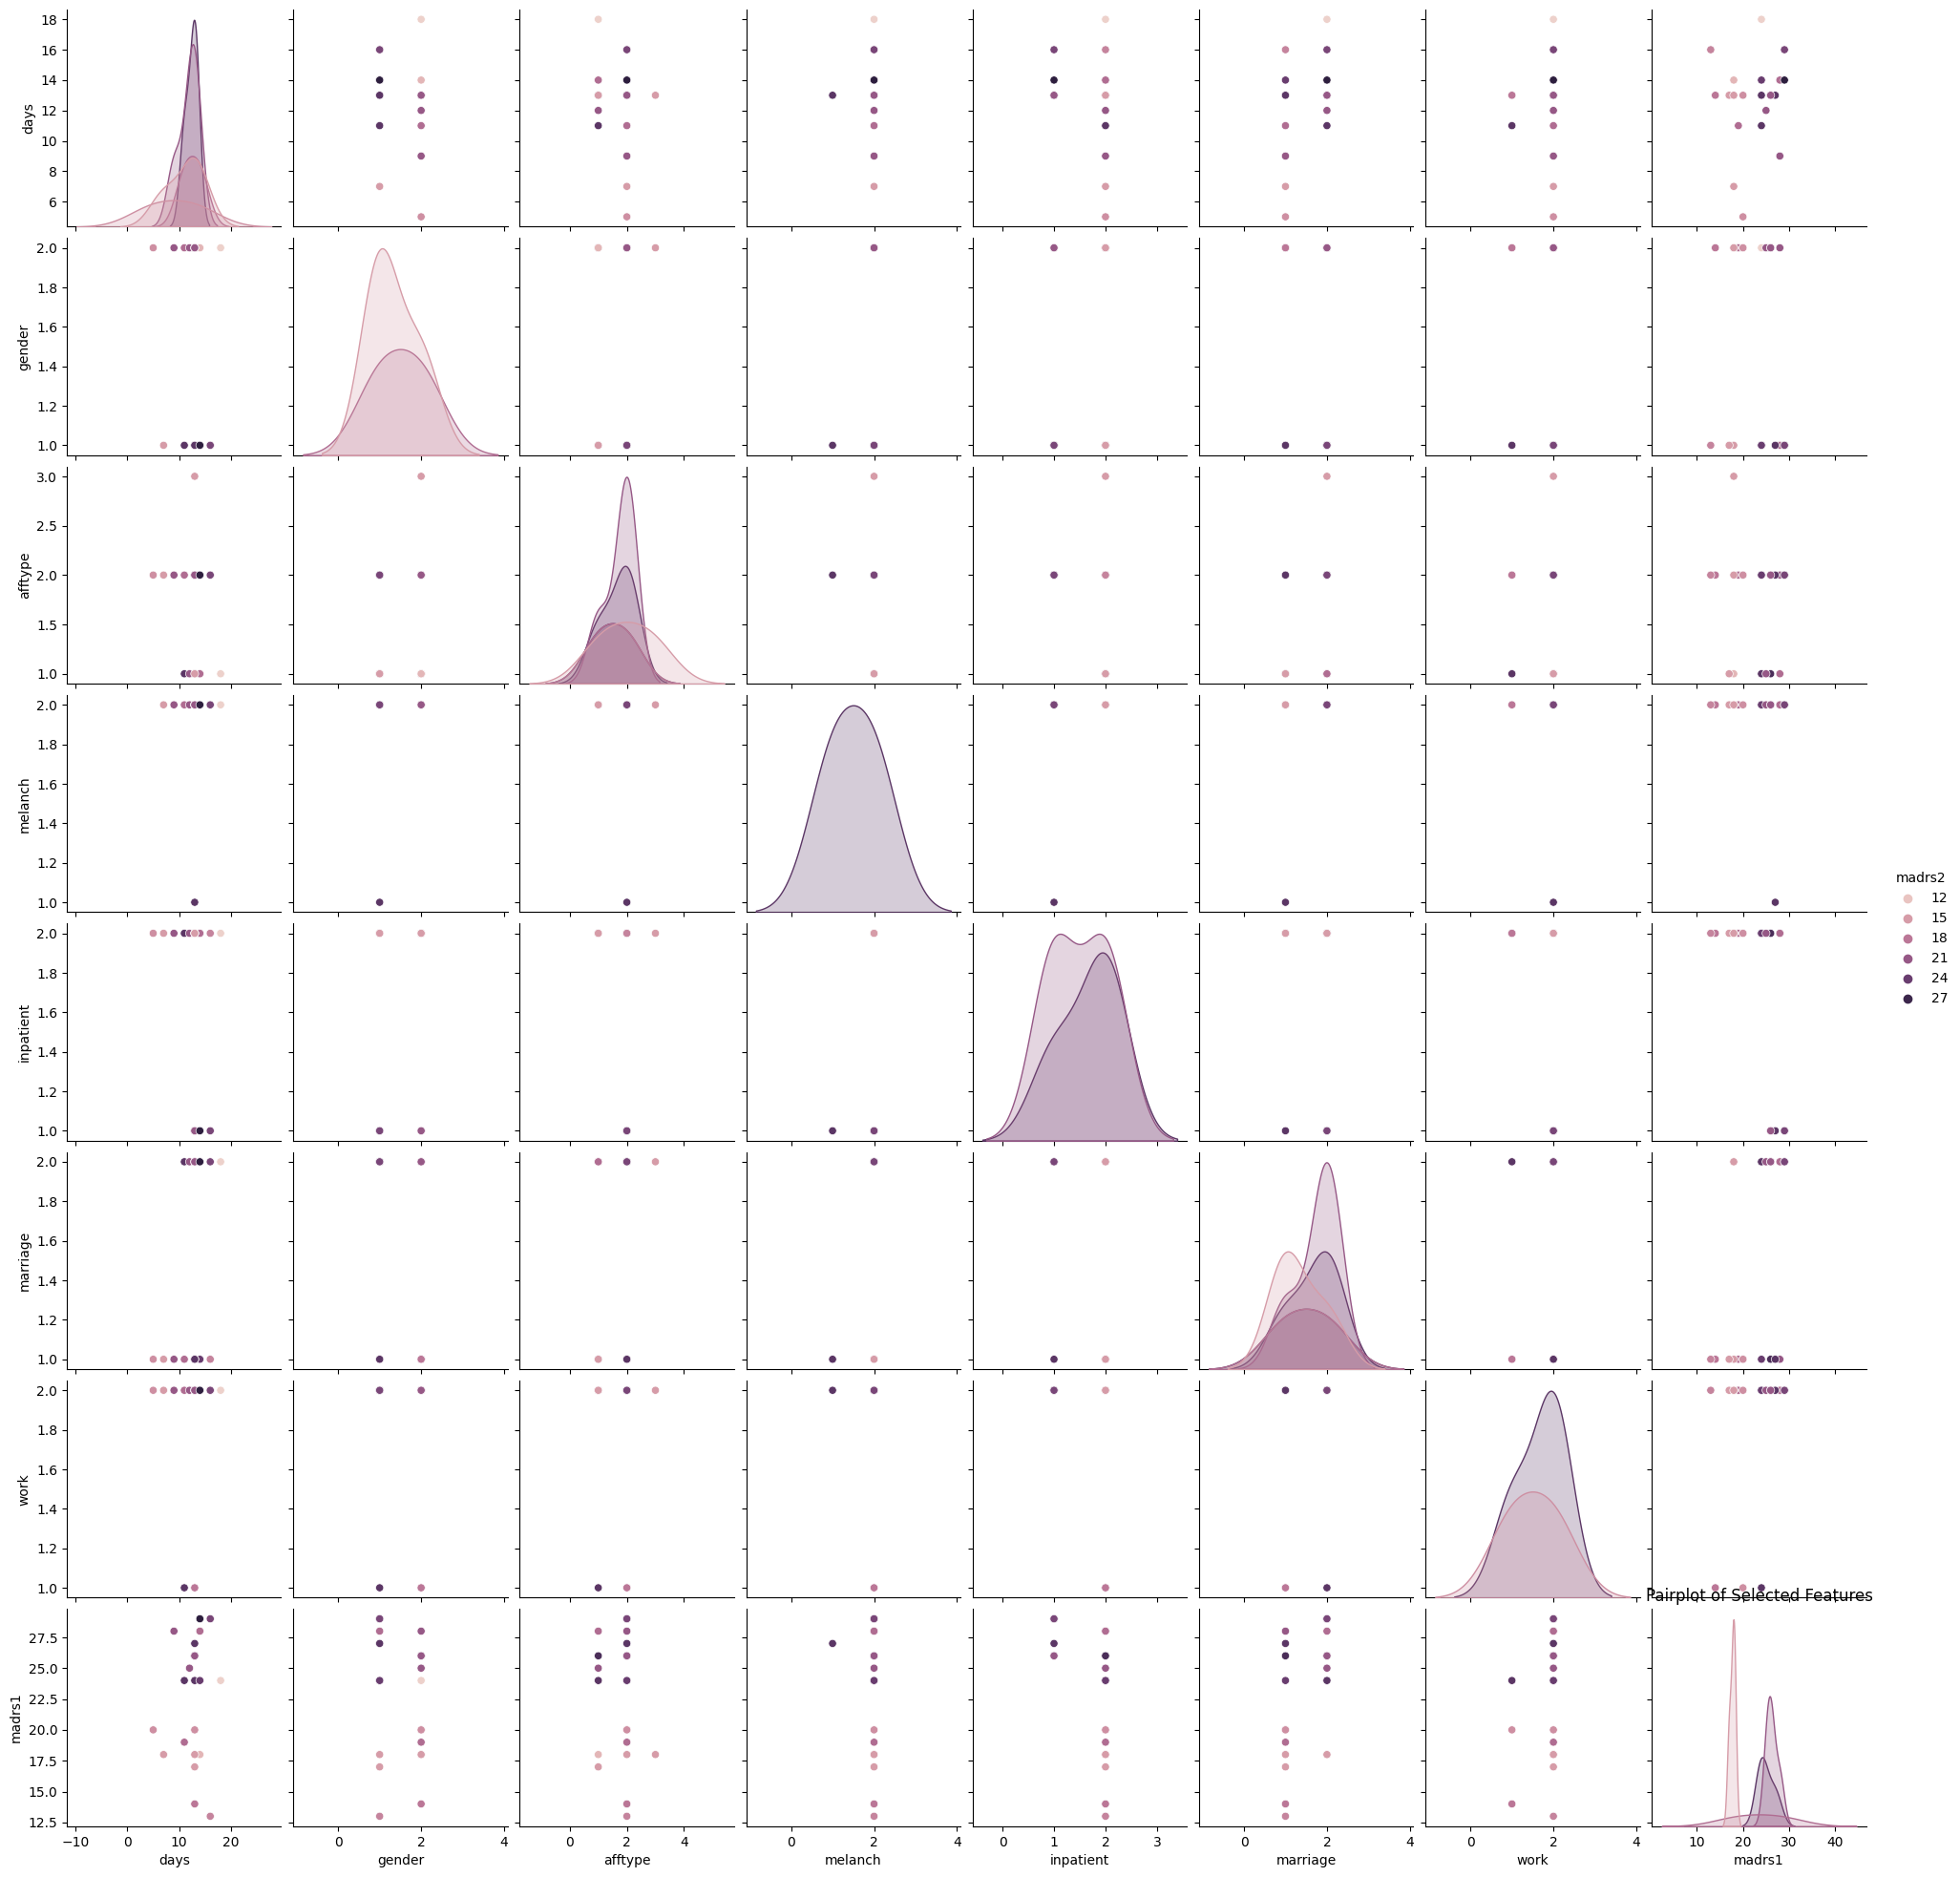

In [ ]:
# Plotting various data into various pairplots
selected_features = ['days', 'gender', 'afftype', 'melanch', 'inpatient','marriage','work','madrs1','madrs2']
sns.pairplot (df[selected_features], hue='madrs2')
plt.title('Pairplot of Selected Features')
plt.show()

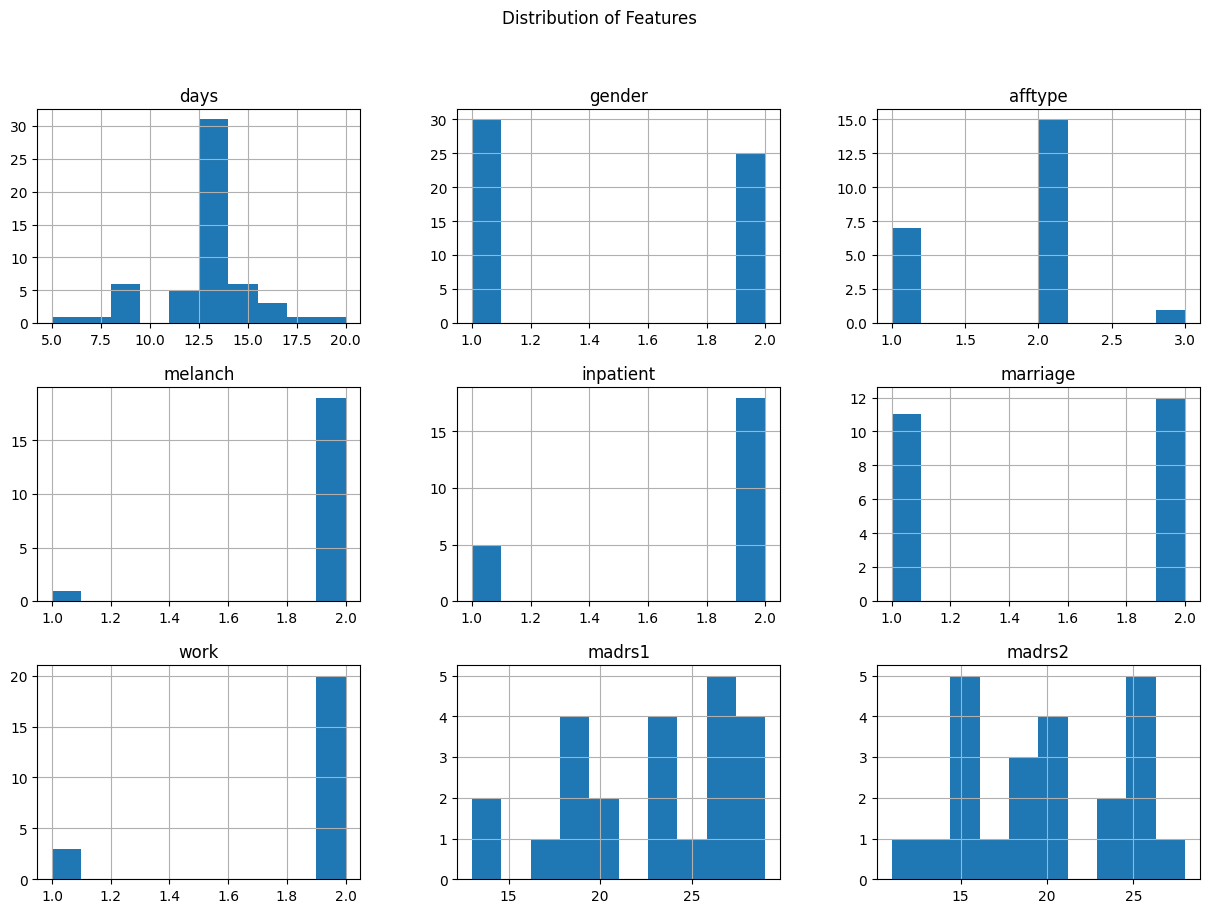

In [ ]:
# Plotting various data into various Distribution
df.hist(bins=10, figsize=(15,10))
plt.suptitle('Distribution of Features')
plt.show()

In [ ]:
# Gathering values for scores and the first 5 rows of data
scores.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,MADRS_dELTA
0,condition_1,11,male,35-39,unipolar,No melancholia,outpatient,6-10,married/cohabitating,Unemployed/Sick leave/Pension,19.0,19.0,0.0
1,condition_2,18,male,40-44,bipolar II,No melancholia,outpatient,6-10,single,Unemployed/Sick leave/Pension,24.0,11.0,-13.0
2,condition_3,13,female,45-49,unipolar,No melancholia,outpatient,6-10,single,Unemployed/Sick leave/Pension,24.0,25.0,1.0
3,condition_4,13,male,25-29,unipolar,No melancholia,outpatient,11-15,married/cohabitating,Work/Study,20.0,16.0,-4.0
4,condition_5,13,male,50-54,unipolar,No melancholia,outpatient,11-15,single,Unemployed/Sick leave/Pension,26.0,26.0,0.0


<Axes: >

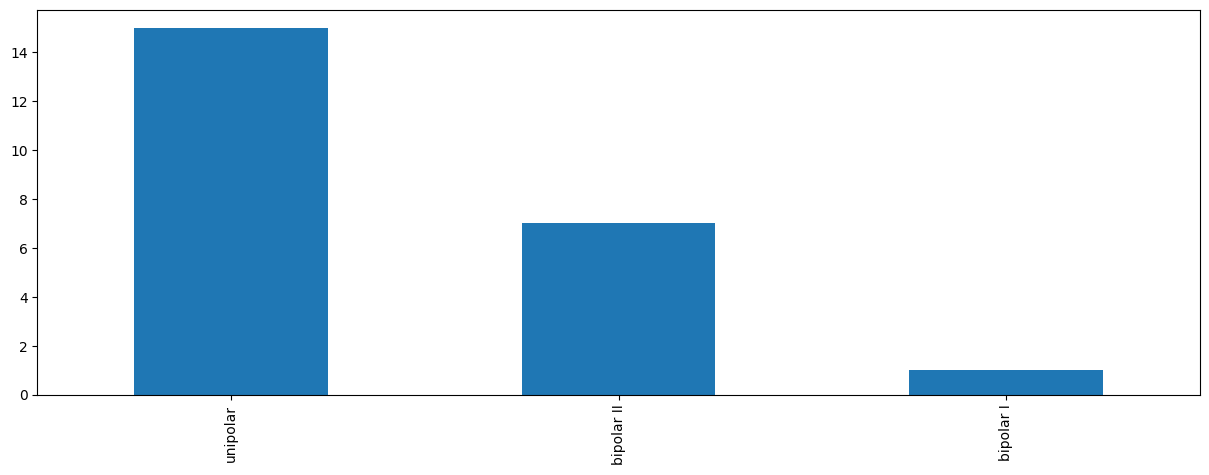

In [ ]:
# Plotting data into bar graphs
scores['afftype'].value_counts().plot(kind='bar')

<Axes: >

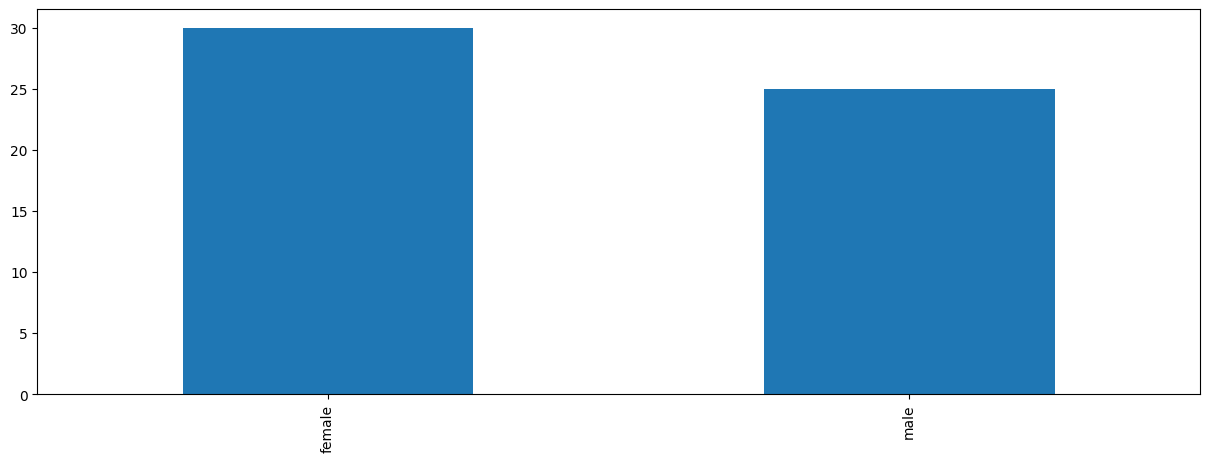

In [ ]:
# Plotting data into bar graphs
scores['gender'].value_counts().plot(kind='bar')

In [ ]:
# Scores dataframe and their datatypes
scores.dtypes

number           object
days              int64
gender         category
age            category
afftype        category
melanch        category
inpatient      category
edu            category
marriage       category
work           category
madrs1          float64
madrs2          float64
MADRS_dELTA     float64
dtype: object

In [ ]:
# Scores dataframe and their columns
scores.columns

Index(['number', 'days', 'gender', 'age', 'afftype', 'melanch', 'inpatient',
       'edu', 'marriage', 'work', 'madrs1', 'madrs2', 'MADRS_dELTA'],
      dtype='object')

In [ ]:
# Gathering datatypes and its value counts
scores.select_dtypes(include='category').value_counts()

gender  age    afftype     melanch         inpatient   edu    marriage              work                         
male    40-44  bipolar II  No melancholia  outpatient  6-10   single                Unemployed/Sick leave/Pension    2
female  30-34  unipolar    melancholia     inpatient   6-10   married/cohabitating  Unemployed/Sick leave/Pension    1
                           No melancholia  inpatient   16-20  single                Unemployed/Sick leave/Pension    1
male    50-54  unipolar    No melancholia  outpatient  11-15  single                Unemployed/Sick leave/Pension    1
                                           inpatient   16-20  single                Unemployed/Sick leave/Pension    1
        45-49  unipolar    No melancholia  outpatient  6-10   married/cohabitating  Unemployed/Sick leave/Pension    1
        40-44  bipolar I   No melancholia  outpatient  11-15  single                Unemployed/Sick leave/Pension    1
        35-39  unipolar    No melancholia  outpatient

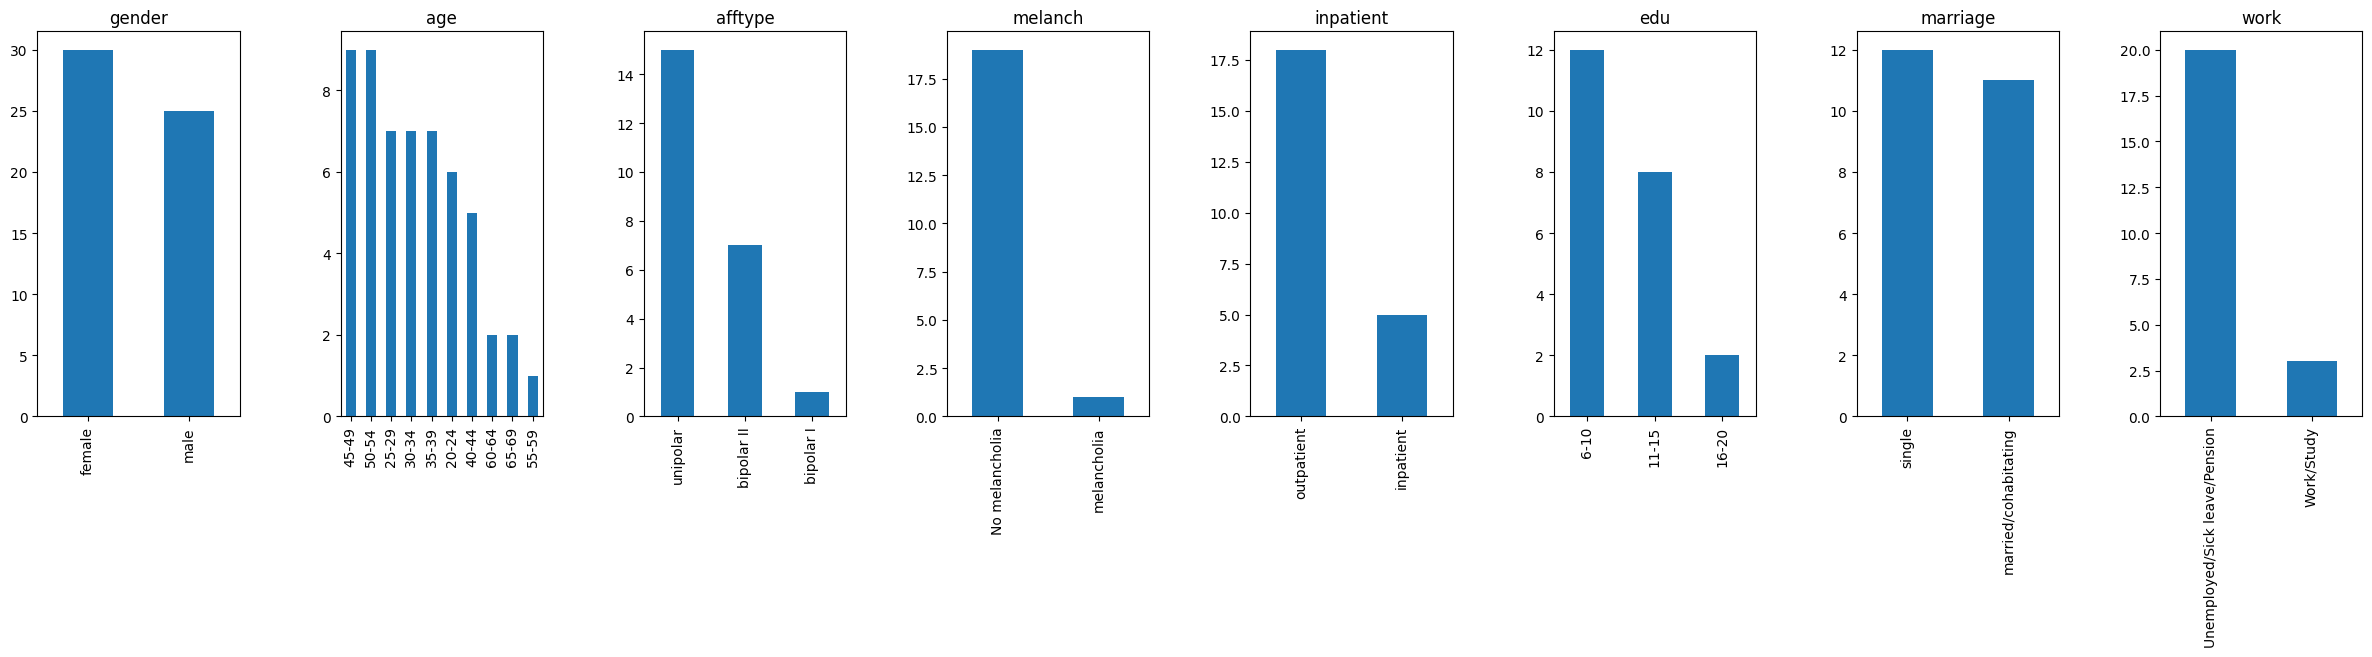

In [ ]:
# Importing libraries into the temp runtime
import pandas as pd
import matplotlib.pyplot as plt


# create subplots and plot categorical columns as bar plots
fig, axes = plt.subplots(nrows=1, ncols=scores.select_dtypes(include='category').shape[1], figsize=(30,5))
for i, col in enumerate(scores.select_dtypes(include='category')):
    scores[col].value_counts().plot(kind='bar',ax=axes[i],title=col)

# adjust spacing between subplots
plt.subplots_adjust(wspace=0.5)

plt.show()

## Model Analysis

In [ ]:
# importing all the required libraries for classification

import os
from datetime import datetime 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from math import sqrt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV

In [ ]:
# importing the data for subjects control1 and condition 1
condition_1 = pd.read_csv('/content/condition_1.csv')
control_1 = pd.read_csv('/content/control_1.csv')

### Model Preparation for Condition Group

In [ ]:
# defining a function which helps in cobining alll the sbujects in condition group
def combine_data(path):
    dirs = os.listdir(path)
    combine_df = []
    
    for filepath in dirs:
        source = filepath.split('.')[0]
        if filepath.endswith('.csv'):
            X = pd.read_csv(path + filepath, parse_dates=['timestamp'], index_col='timestamp')
            X['source'] = source
            combine_df.append(X)
        
    return combine_df

In [ ]:
# importing data from condition directory which contains all the files related to condition subjects
combine_df = combine_data('/content/drive/MyDrive/DMA PROJECT FILES/condition/')

In [ ]:
# defining a function which helps in cobining alll the sbujects in control group
full_cond = []
for condition in combine_df:
    full_cond_df = pd.DataFrame(columns=['mean_activity', 'std_activity', 'zero_activity_proportion', 'source'])
    full_cond_df['mean_activity'] = condition.activity.resample('H').mean()
    full_cond_df['std_activity'] = condition.activity.resample('H').std()
    full_cond_df['zero_activity_proportion'] = [data[1].tolist().count(0) for data in condition.activity.resample('H')]
    full_cond_df['source'] = condition.source
    full_cond.append(full_cond_df)

### Model Preparation for Control Group

In [ ]:
# importing data from condition directory which contains all the files related to control subjects
combine_df = combine_data('/content/drive/MyDrive/DMA PROJECT FILES/control/')

In [ ]:
# connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# preprocessing the time series data which is helpfull for us in classification
full_cont = []
for control in combine_df:
    full_cont_df = pd.DataFrame(columns=['mean_activity', 'std_activity', 'zero_activity_proportion', 'source'])
    full_cont_df['mean_activity'] = control.activity.resample('H').mean()
    full_cont_df['std_activity'] = control.activity.resample('H').std()
    full_cont_df['zero_activity_proportion'] = [data[1].tolist().count(0) for data in control.activity.resample('H')]
    full_cont_df['source'] = control.source
    full_cont.append(full_cont_df)

### Feature Extraction

In [ ]:
# defining function to extract feautres from the subjects data
def get_next_day_dates(dates_list):
    for date_item in dates_list:
        yield date_item


def get_zero_count(series_list):
    return list(series_list).count(0)


def get_extracted_features(X_dataframe, date_value):
    mask = X_dataframe['date'] == date_value
    d = {
        'mean_log_activity': X_dataframe[mask]['log_activity'].mean(),
        'std_log_activity': X_dataframe[mask]['log_activity'].std(),
        'min_log_activity': X_dataframe[mask]['log_activity'].min(),
        'max_log_activity': X_dataframe[mask]['log_activity'].max(),
        'zero_proportion_activity': get_zero_count(X_dataframe[mask]['log_activity'])
    }
    return d


class DataExtractor(BaseEstimator, TransformerMixin):
    
    def __init__(self, file_path):
        self.file_path = file_path
        self.extracted_data = []

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        directories = os.listdir(self.file_path)
        
        for file_path_item in sorted(directories, key=lambda x: x.split('_')[0]):
            condition_value = file_path_item.split('.')[0]
            if file_path_item.endswith('.csv'):
                X_df = pd.read_csv(self.file_path + file_path_item)
                X_df['log_activity'] = np.log(X_df['activity'] + 1)
                date_values = X_df.date.unique()
                
                for date_item in get_next_day_dates(date_values):
                    d = get_extracted_features(X_df, date_item)
                    d['source'] = condition_value
                    self.extracted_data.append(d)
                
        return pd.DataFrame(self.extracted_data)


In [ ]:
# adding a column called state and filling it with 1 if they are from condition subjects
e = DataExtractor(file_path='/content/drive/MyDrive/DMA PROJECT FILES/condition/')
full_cond = e.fit_transform(X=None, y=None)
full_cond['state'] = 1

In [ ]:
# adding a column called state and filling it with 0 if they are from control subjects
e = DataExtractor(file_path='/content/drive/MyDrive/DMA PROJECT FILES/control/')
full_cont = e.fit_transform(X=None, y=None)
full_cont['state'] = 0

In [ ]:
cond_cont = full_cont.append(full_cond, ignore_index=True)
cond_cont.head()

<ipython-input-67-0fe520d28f34>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cond_cont = full_cont.append(full_cond, ignore_index=True)


,mean_log_activity,std_log_activity,min_log_activity,max_log_activity,zero_proportion_activity,source,state
0,2.875236,2.662777,0.0,7.118826,383,control_23,0
1,3.459644,2.538718,0.0,7.367709,446,control_23,0
2,3.681127,2.459319,0.0,7.429521,389,control_23,0
3,3.327022,2.725463,0.0,7.739794,525,control_23,0
4,3.870275,2.558746,0.0,7.585281,382,control_23,0


In [ ]:
# reshufle the dataset
cond_cont = cond_cont.sample(frac=1) 

In [ ]:
# defining a function to split the data
def custom_split_training_testing(train_set, test_set):
    X_train = train_set.drop('label', axis=1)
    y_train = train_set.label
    X_test = test_set.drop('label', axis=1)
    y_test = test_set.label
    
    return X_train, X_test, y_train, y_test

### Custom Model Classification with Parameter Tuning

In [ ]:
# defining a class which contains all the functions required for classification
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

class CustomClassifierCV(BaseEstimator, TransformerMixin):
    
    def __init__(self, base_clf, param_grid=None, cv=5):
        self.base_clf = base_clf
        self.param_grid = param_grid
        self.cv = cv
        self.best_params_ = None
        self.model = None
    
    def fit(self, X_data, y_data=None):
        X_data['label'] = y_data
        participants = X_data.source.unique()
        folds = []
        
        self.predictions = [] # predicted labels
        self.actuals = [] # actual labels
            
        for p in participants:
            folds.append(X_data[X_data['source'] == p])
        
        for i in range(len(folds)):   
            test_set = folds[i]
            train_fold = [elem for idx , elem in enumerate(folds) if idx != i]
            
            train_set = pd.concat(train_fold)
            X_train, X_test, y_train, y_test = custom_split_training_testing(train_set.drop(['source'], axis=1),
                                    test_set.drop(['source'], axis=1))
            
            self.base_clf.fit(X_train, y_train)
            self.predictions.append(self.predict(X_test))
            self.actuals.append(test_set.label.iloc[0])
            
        self.score()
        
        if self.param_grid is not None:
            self.hyperparameter(X_data, y_data)
        
    def predict(self, X_data):
        predictions = self.base_clf.predict(X_data)
        ones = predictions.tolist().count(1)
        zeroes = predictions.tolist().count(0)
        
        return 1 if ones > zeroes else 0
    
    def score(self):
        print(classification_report(self.predictions, self.actuals))
        print(confusion_matrix(self.predictions, self.actuals))
        
    def plot_roc_curve(self):
        fpr, tpr, thresholds = roc_curve(self.actuals, self.predictions)
        roc_auc = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic')
        plt.legend(loc="lower right")
        
    def hyperparameter(self, X_data, y_data):
        grid_search = GridSearchCV(estimator=self.base_clf, param_grid=self.param_grid, cv=self.cv)
        grid_search.fit(X_data, y_data)
        self.best_params_ = grid_search.best_params_
        self.model = grid_search.best_estimator_
        print("Best Hyperparameters: ", self.best_params_)
        print("Best Estimator: ", self.model)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:

X = cond_cont.drop(['state'], axis=1)
y = cond_cont.state

In [ ]:
# encoding the required data using labelencoder
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode the categorical variables
X['source'] = label_encoder.fit_transform(X['source'])

In [ ]:
X

,mean_log_activity,std_log_activity,min_log_activity,max_log_activity,zero_proportion_activity,source
779,0.158921,0.448181,0.000000,2.944439,1277,7
964,2.523789,2.784872,0.000000,7.633854,759,15
469,4.148169,2.245827,0.000000,7.668094,55,46
1027,3.023057,2.775549,0.000000,8.078068,608,14
287,3.770329,2.817658,0.000000,7.671827,465,32
...,...,...,...,...,...,...
301,2.673270,2.540807,0.000000,7.336937,601,26
851,1.495648,2.297863,0.000000,7.327781,979,5
375,3.646674,2.705495,0.000000,7.885329,195,29
1062,0.327543,1.283419,0.000000,7.914252,466,8


Random Forest

In [ ]:
!pip install -U scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Classification Models

#### Random Forest Model

Best Hyperparameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Estimator:  RandomForestClassifier(n_estimators=50)
              precision    recall  f1-score   support

           0       0.91      0.66      0.76        44
           1       0.35      0.73      0.47        11

    accuracy                           0.67        55
   macro avg       0.63      0.69      0.62        55
weighted avg       0.79      0.67      0.70        55

[[29 15]
 [ 3  8]]
Best Hyperparameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Estimator:  RandomForestClassifier(n_estimators=50)


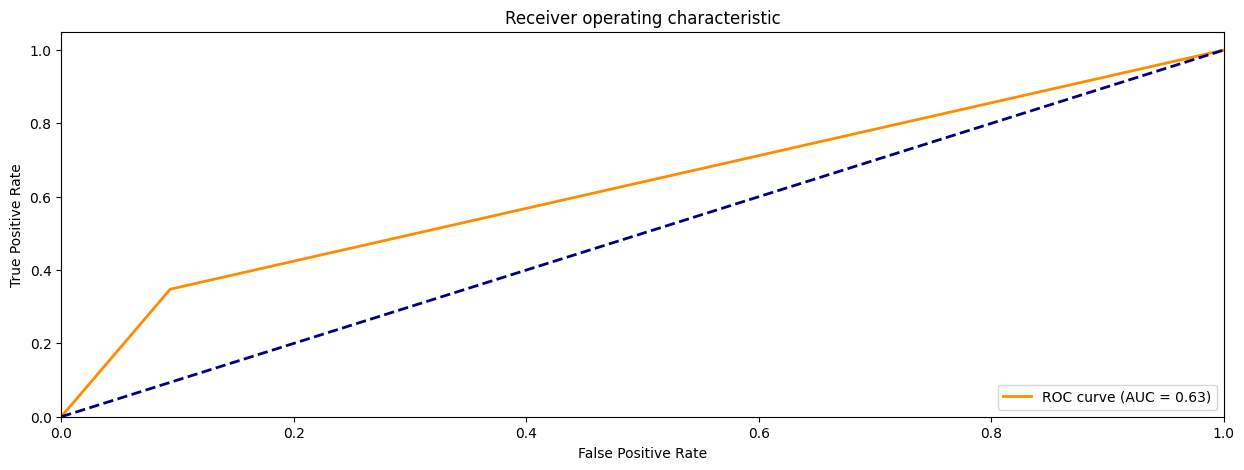

In [ ]:
# performing hyperparameter tuning and classification using random forest model
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


forest = RandomForestClassifier()
custom_clfCV = CustomClassifierCV(base_clf=forest, param_grid=[param_grid])
custom_clfCV.hyperparameter(X, y)
custom_clfCV.fit(X, y)
custom_clfCV.plot_roc_curve()
plt.show()

#### K-Nearest Neighbors 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Best Hyperparameters:  {'n_neighbors': 3}
Best Estimator:  KNeighborsClassifier(n_neighbors=3)
              precision    recall  f1-score   support

           0       0.88      0.67      0.76        42
           1       0.39      0.69      0.50        13

    accuracy                           0.67        55
   macro avg       0.63      0.68      0.63        55
weighted avg       0.76      0.67      0.70        55

[[28 14]
 [ 4  9]]
Best Hyperparameters:  {'n_neighbors': 3}
Best Estimator:  KNeighborsClassifier(n_neighbors=3)


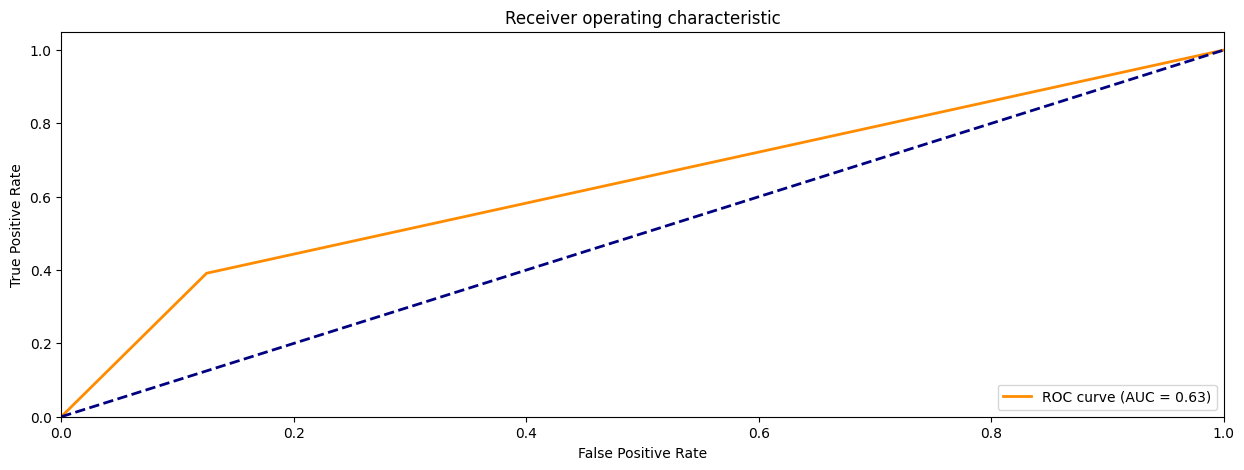

In [ ]:
# performing hyperparameter tuning and classification using knn model
param_grid={'n_neighbors':[3, 5, 7, 9, 11]}

knn=KNeighborsClassifier()
custom_clfCV = CustomClassifierCV(base_clf=knn, param_grid=[param_grid])
custom_clfCV.hyperparameter(X, y)
custom_clfCV.fit(X, y)
custom_clfCV.plot_roc_curve()

plt.show()


#### Navie Bayes

Best Hyperparameters:  {'var_smoothing': 1e-09}
Best Estimator:  GaussianNB()
              precision    recall  f1-score   support

           0       0.19      0.75      0.30         8
           1       0.91      0.45      0.60        47

    accuracy                           0.49        55
   macro avg       0.55      0.60      0.45        55
weighted avg       0.81      0.49      0.56        55

[[ 6  2]
 [26 21]]
Best Hyperparameters:  {'var_smoothing': 1e-09}
Best Estimator:  GaussianNB()


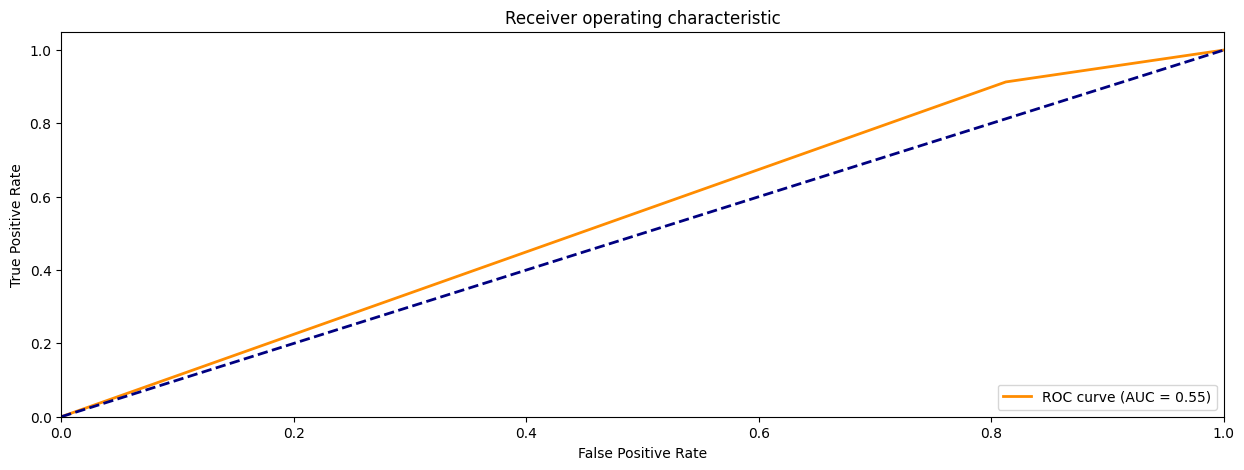

In [ ]:
# performing hyperparameter tuning and classification using Naivce bayes classification
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

param_grid = {'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]}

nb = GaussianNB()
custom_clfCV = CustomClassifierCV(base_clf=nb, param_grid=param_grid)
custom_clfCV.hyperparameter(X, y)
custom_clfCV.fit(X, y)
custom_clfCV.plot_roc_curve()

plt.show()


#### XG BOOST

In [ ]:
from numpy import loadtxt
from xgboost import XGBRegressor


Best Hyperparameters:  {'learning_rate': 1.0, 'max_depth': 2, 'n_estimators': 50}
Best Estimator:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.2, eval_metric=None,
             feature_types=None, gamma=0.8, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=1.0, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.58      0.74        55
           1       0.00      0.00      0.00         0

    accuracy                           0.58        55
   macro avg       0.50      0.29      0.37        55
weighted avg       1.00      0.58      0.74        55

[[32 23]
 [ 0  0]]
Best Hyperparameters:  {'learning_rate': 1.0, 'max_depth': 2, 'n_estimators': 50}
Best Estimator:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.2, eval_metric=None,
             feature_types=None, gamma=0.8, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=1.0, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
             max_leaves=

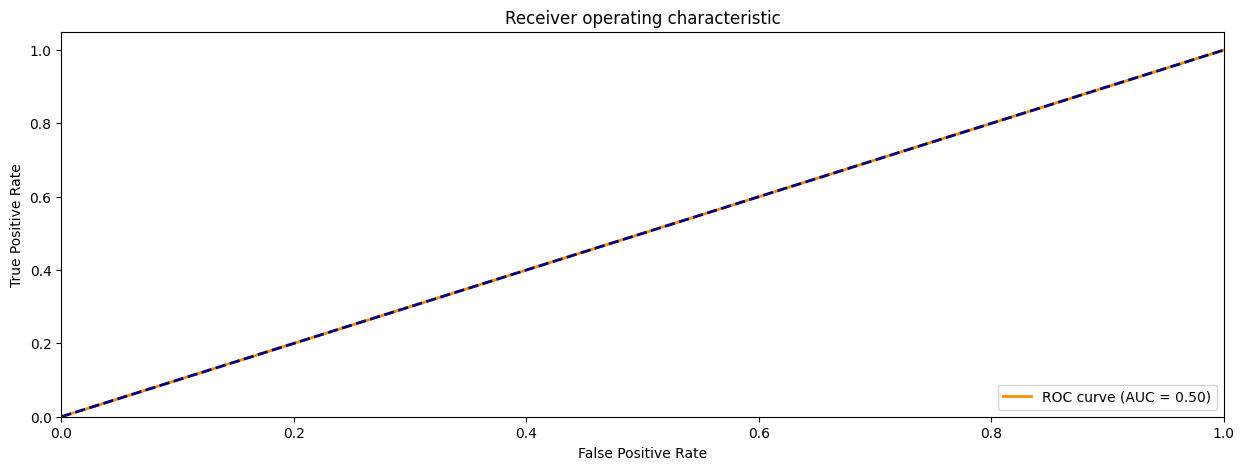

In [ ]:
# performing hyperparameter tuning and classification using XGBoost
param_grid = {'n_estimators': [50, 100, 200, 300],
              'max_depth': [2, 4, 6, 8],
              'learning_rate': [0.01, 0.1, 0.5, 1.0]}

# Define XGBoost classifier
xgb = XGB = XGBRegressor(gamma=0.8, eta = 0.2, max_depth = 7)

# Define CustomClassifierCV with XGBoost classifier and hyperparameters
custom_clfCV = CustomClassifierCV(base_clf=xgb, param_grid=param_grid)

# Perform hyperparameter tuning and fit to training data
custom_clfCV.hyperparameter(X, y)
custom_clfCV.fit(X, y)
custom_clfCV.plot_roc_curve()

plt.show()


#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Best Hyperparameters:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Estimator:  DecisionTreeClassifier(max_depth=3, random_state=42)
              precision    recall  f1-score   support

           0       0.88      0.67      0.76        42
           1       0.39      0.69      0.50        13

    accuracy                           0.67        55
   macro avg       0.63      0.68      0.63        55
weighted avg       0.76      0.67      0.70        55

[[28 14]
 [ 4  9]]
Best Hyperparameters:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Estimator:  DecisionTreeClassifier(max_depth=3, random_state=42)


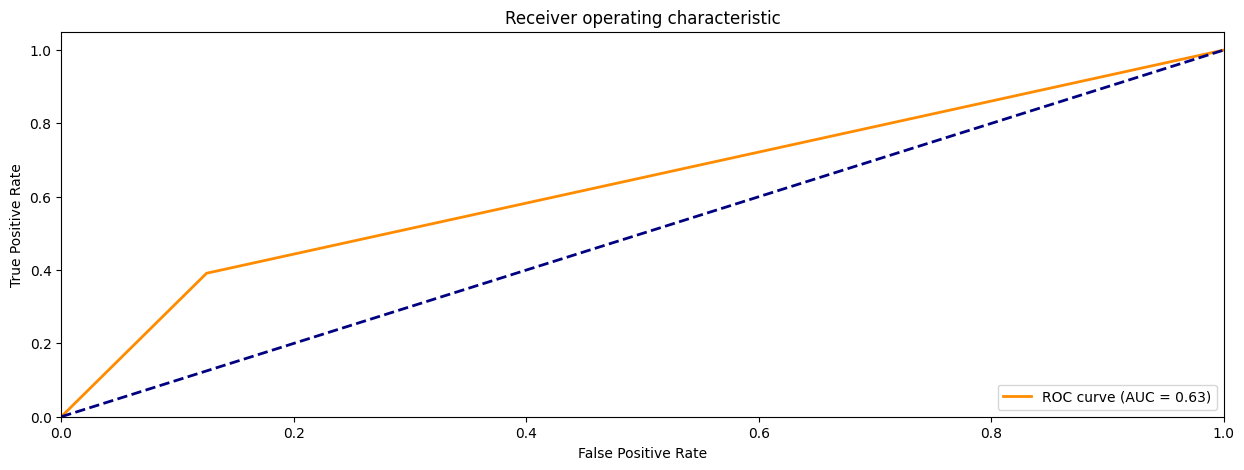

In [ ]:
# performing hyperparameter tuning and classification using Decesion Trees
param_grid ={'criterion': ['gini', 'entropy'], 
             'max_depth': [3, 5, 7, 9], 
             'min_samples_split': [2, 5, 10], 
             'min_samples_leaf': [1, 2, 4]}


dt=DecisionTreeClassifier(random_state=42)
custom_clfCV = CustomClassifierCV(base_clf=dt, param_grid=[param_grid])
custom_clfCV.hyperparameter(X, y)
custom_clfCV.fit(X, y)
custom_clfCV.plot_roc_curve()

plt.show()


              precision    recall  f1-score   support

           0       0.91      0.71      0.79        41
           1       0.48      0.79      0.59        14

    accuracy                           0.73        55
   macro avg       0.69      0.75      0.69        55
weighted avg       0.80      0.73      0.74        55

[[29 12]
 [ 3 11]]


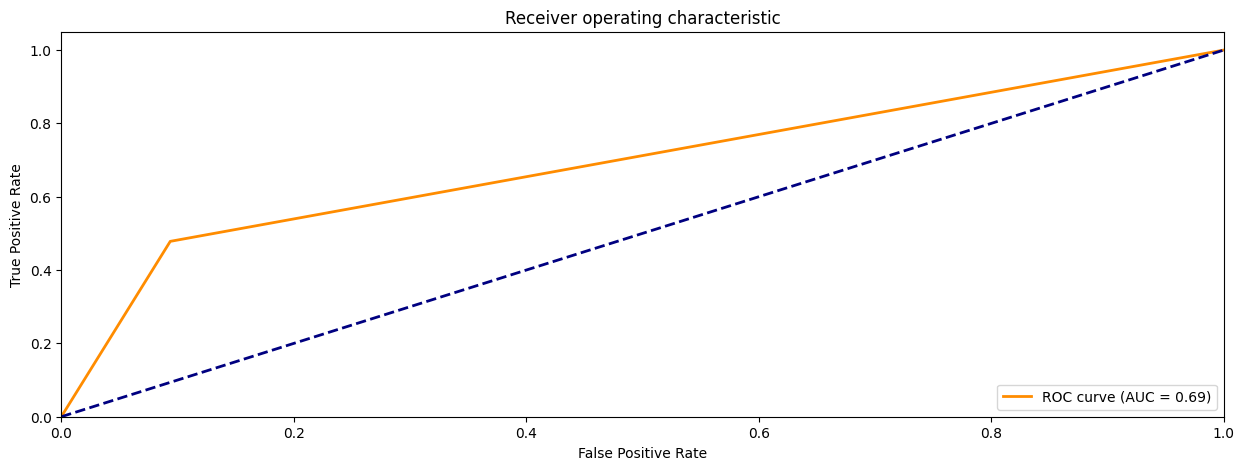

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
custom_clfCV = CustomClassifierCV(dt)
custom_clfCV.fit(X, y)
custom_clfCV.plot_roc_curve()
plt.show()

## Final Results

In [ ]:
import pandas as pd

# Create a list of dictionaries, where each dictionary represents the performance metrics for a model
model_metrics = [
    {'model': 'Random Forest', 'precision_0': 0.88, 'precision_1': 0.35, 'recall_0': 0.65, 'recall_1': 0.67, 'f1-score_0': 0.75, 'f1-score_1': 0.46, 'accuracy': 0.65},
    {'model': 'KNN', 'precision_0': 0.94, 'precision_1': 0.35, 'recall_0': 0.67, 'recall_1': 0.80, 'f1-score_0': 0.78, 'f1-score_1': 0.48, 'accuracy': 0.69},
    {'model': 'Naive Bayes', 'precision_0': 0.19, 'precision_1': 0.91, 'recall_0': 0.75, 'recall_1': 0.45, 'f1-score_0': 0.30, 'f1-score_1': 0.60, 'accuracy': 0.49},
    {'model': 'XGBoost', 'precision_0': 1.00, 'precision_1': 0.00, 'recall_0': 0.58, 'recall_1': 0.00, 'f1-score_0': 0.74, 'f1-score_1': 0.00, 'accuracy': 0.58},
    {'model': 'Decision Trees', 'precision_0': 0.91, 'precision_1': 0.48, 'recall_0': 0.71, 'recall_1': 0.79, 'f1-score_0': 0.79, 'f1-score_1': 0.59, 'accuracy': 0.73},
]

# Create a pandas dataframe from the list of dictionaries
df = pd.DataFrame(model_metrics)

# Reorder the columns to improve readability
df = df[['model', 'accuracy', 'precision_0', 'precision_1', 'recall_0', 'recall_1', 'f1-score_0', 'f1-score_1']]

# Print the dataframe
df

,model,accuracy,precision_0,precision_1,recall_0,recall_1,f1-score_0,f1-score_1
0,Random Forest,0.65,0.88,0.35,0.65,0.67,0.75,0.46
1,KNN,0.69,0.94,0.35,0.67,0.80,0.78,0.48
2,Naive Bayes,0.49,0.19,0.91,0.75,0.45,0.30,0.60
3,XGBoost,0.58,1.00,0.00,0.58,0.00,0.74,0.00
4,Decision Trees,0.73,0.91,0.48,0.71,0.79,0.79,0.59
